In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from constants import *
from get_dataframes import *

plt.rcParams['figure.dpi'] = 300

In [2]:
# supplementary figures 

def get_confusion_heatmap(
    df: pd.DataFrame,
    model: str,
    condition: str,
    subtlety_col: str,
    judge_col: str,
    save : bool = True
):
    # prep data
    df = df[df['model'] == model].copy()
    all_subtlety_vals = sorted(df[subtlety_col].unique())
    all_judge_vals = sorted(df[judge_col].unique())

    if condition is not None:
        df = df[df['condition'] == condition]
    cond_label = condition_rename_map.get(condition, condition)
    color_hex = HEX.get(cond_label, '#999999')
    palette = sns.light_palette(color_hex, as_cmap=True)

    # full confusion matrix with all values
    cm = pd.crosstab(df[subtlety_col], df[judge_col])
    cm = cm.reindex(index=all_subtlety_vals, columns=all_judge_vals, fill_value=0)

    _, ax = plt.subplots(
        figsize=(10, max(4, len(all_subtlety_vals) * 0.5))
    )
    
    if subtlety_col == "Subtlety -- Number of Points Beyond Vertex":
        cm = cm.reindex(columns=["Both", "Specific Only", "Broad Only", "Neither"])
        cm = cm.reindex(index=[9, 7, 5, 3])

    if subtlety_col == "Subtlety -- Vertical Z-Score":
        cm = cm.reindex(columns=["Correct\nOutlier\nOnly", "Other/\nMultiple\nOutliers", "No\nOutlier"])
        cm = cm.reindex(index=[">3", "(2,3]", "(1,2]", "≤1"])

    cm_max = 100 if condition != None else 500

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=palette,
        square=True,
        ax=ax,
        cbar_kws={'ticks': [0, cm_max/2, cm_max]},
        vmin=0,
        vmax=cm_max
    )
    # ax.set_aspect('auto')
    ax.set_xlabel(judge_col)
    ax.set_ylabel(subtlety_col)
    ax.set_title(f"{model_rename_map.get(model, model)} -- {cond_label.replace(chr(10), ' ') if cond_label is not None else 'Overall'}", loc='left')
    
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    if subtlety_col in ["Subtlety -- Number of Points Beyond Vertex"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    if subtlety_col in ["Subtlety -- Vertical Z-Score"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    if save: 
        plt.savefig(f'{BASE}llms-vis/sup_images/heatmap_{model}_{condition}_{subtlety_col}.pdf', dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

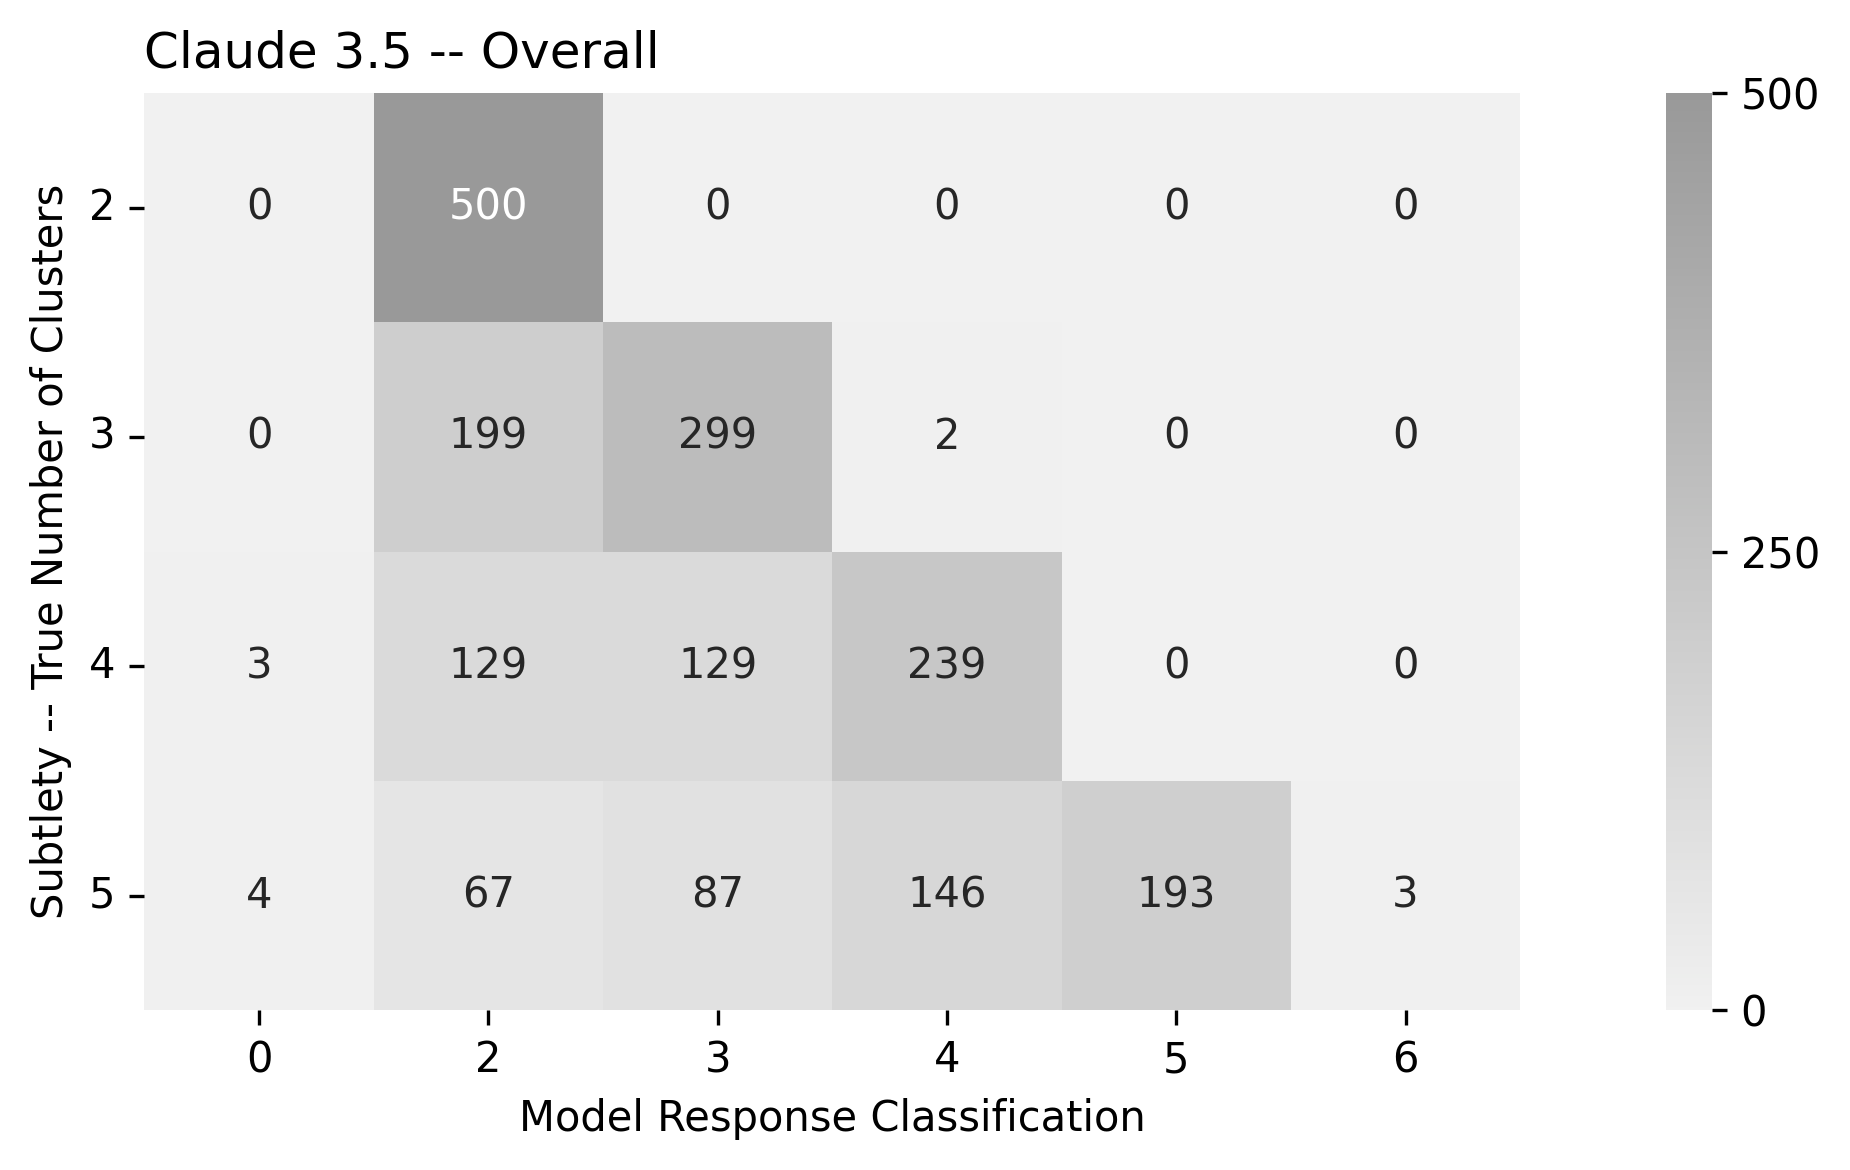

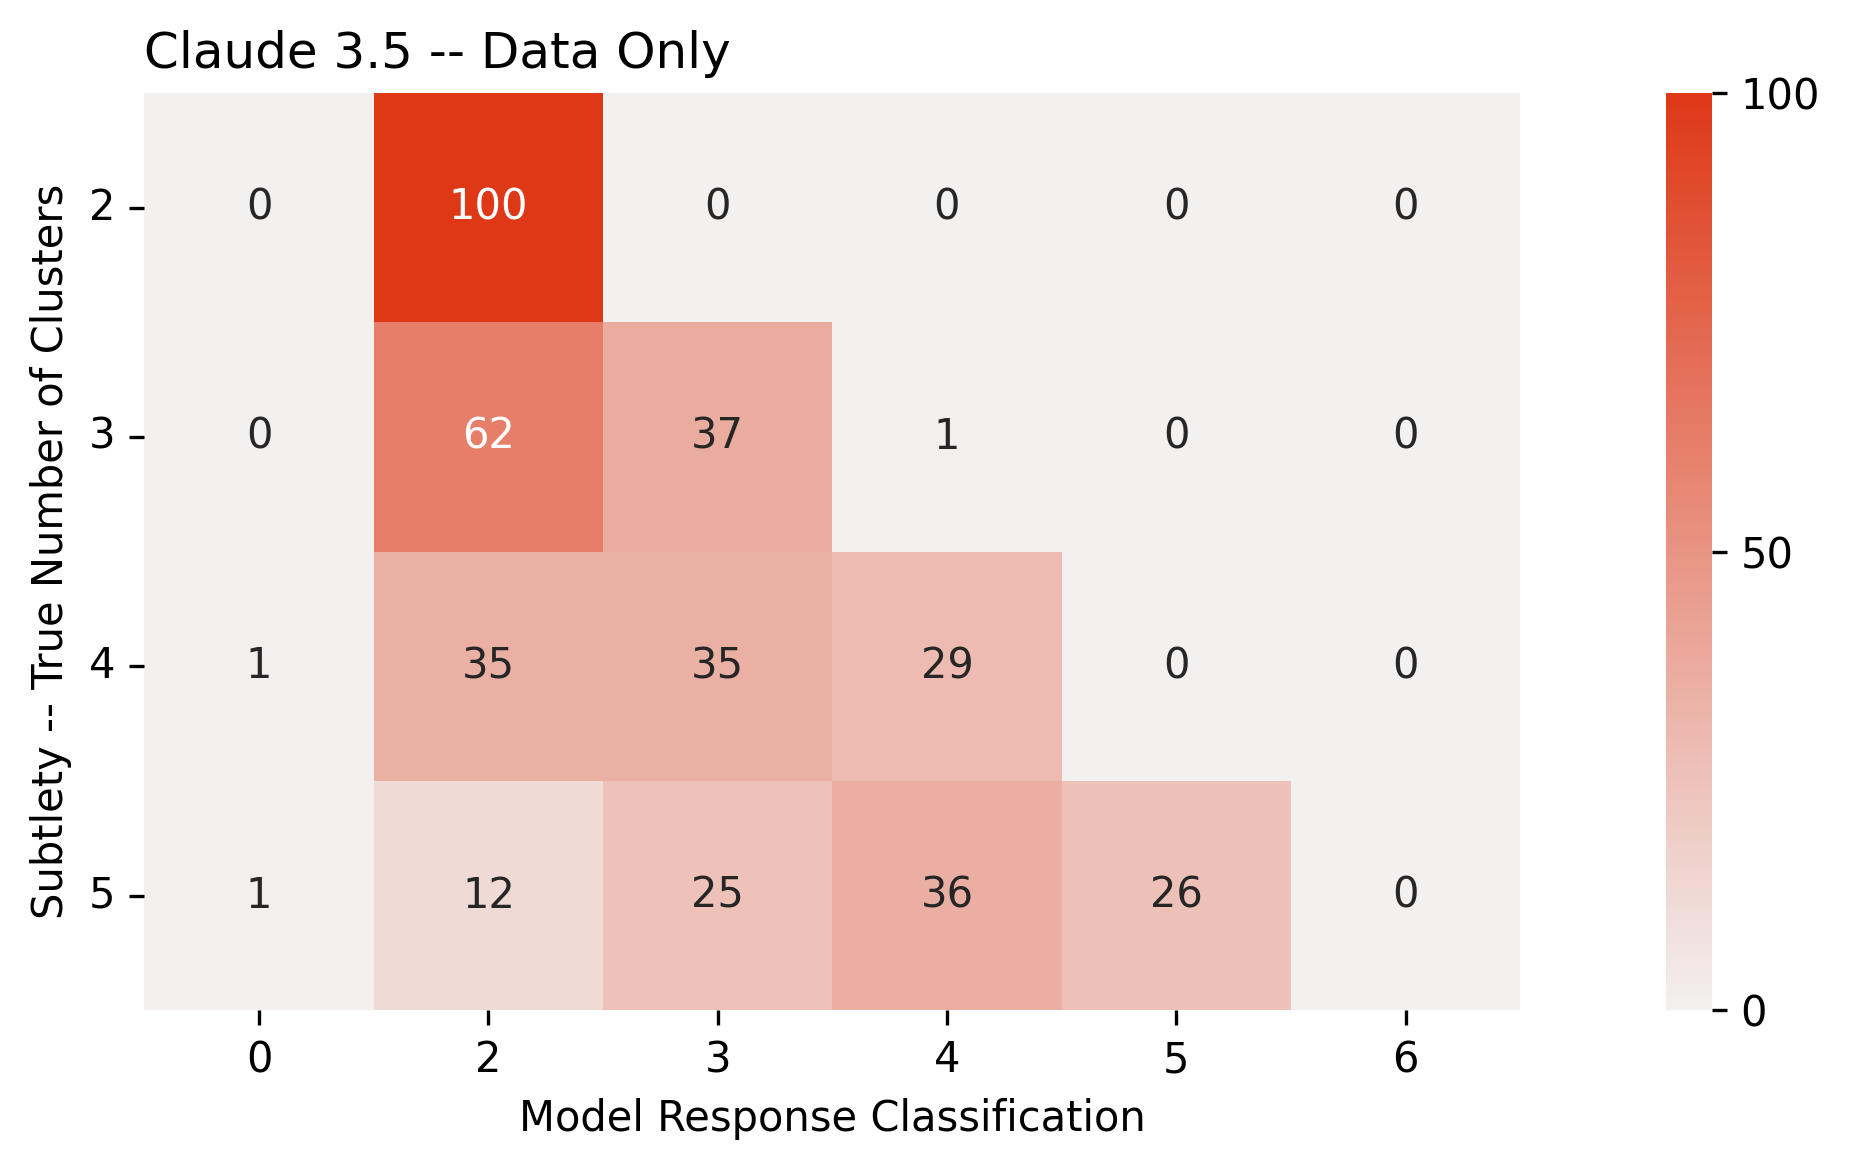

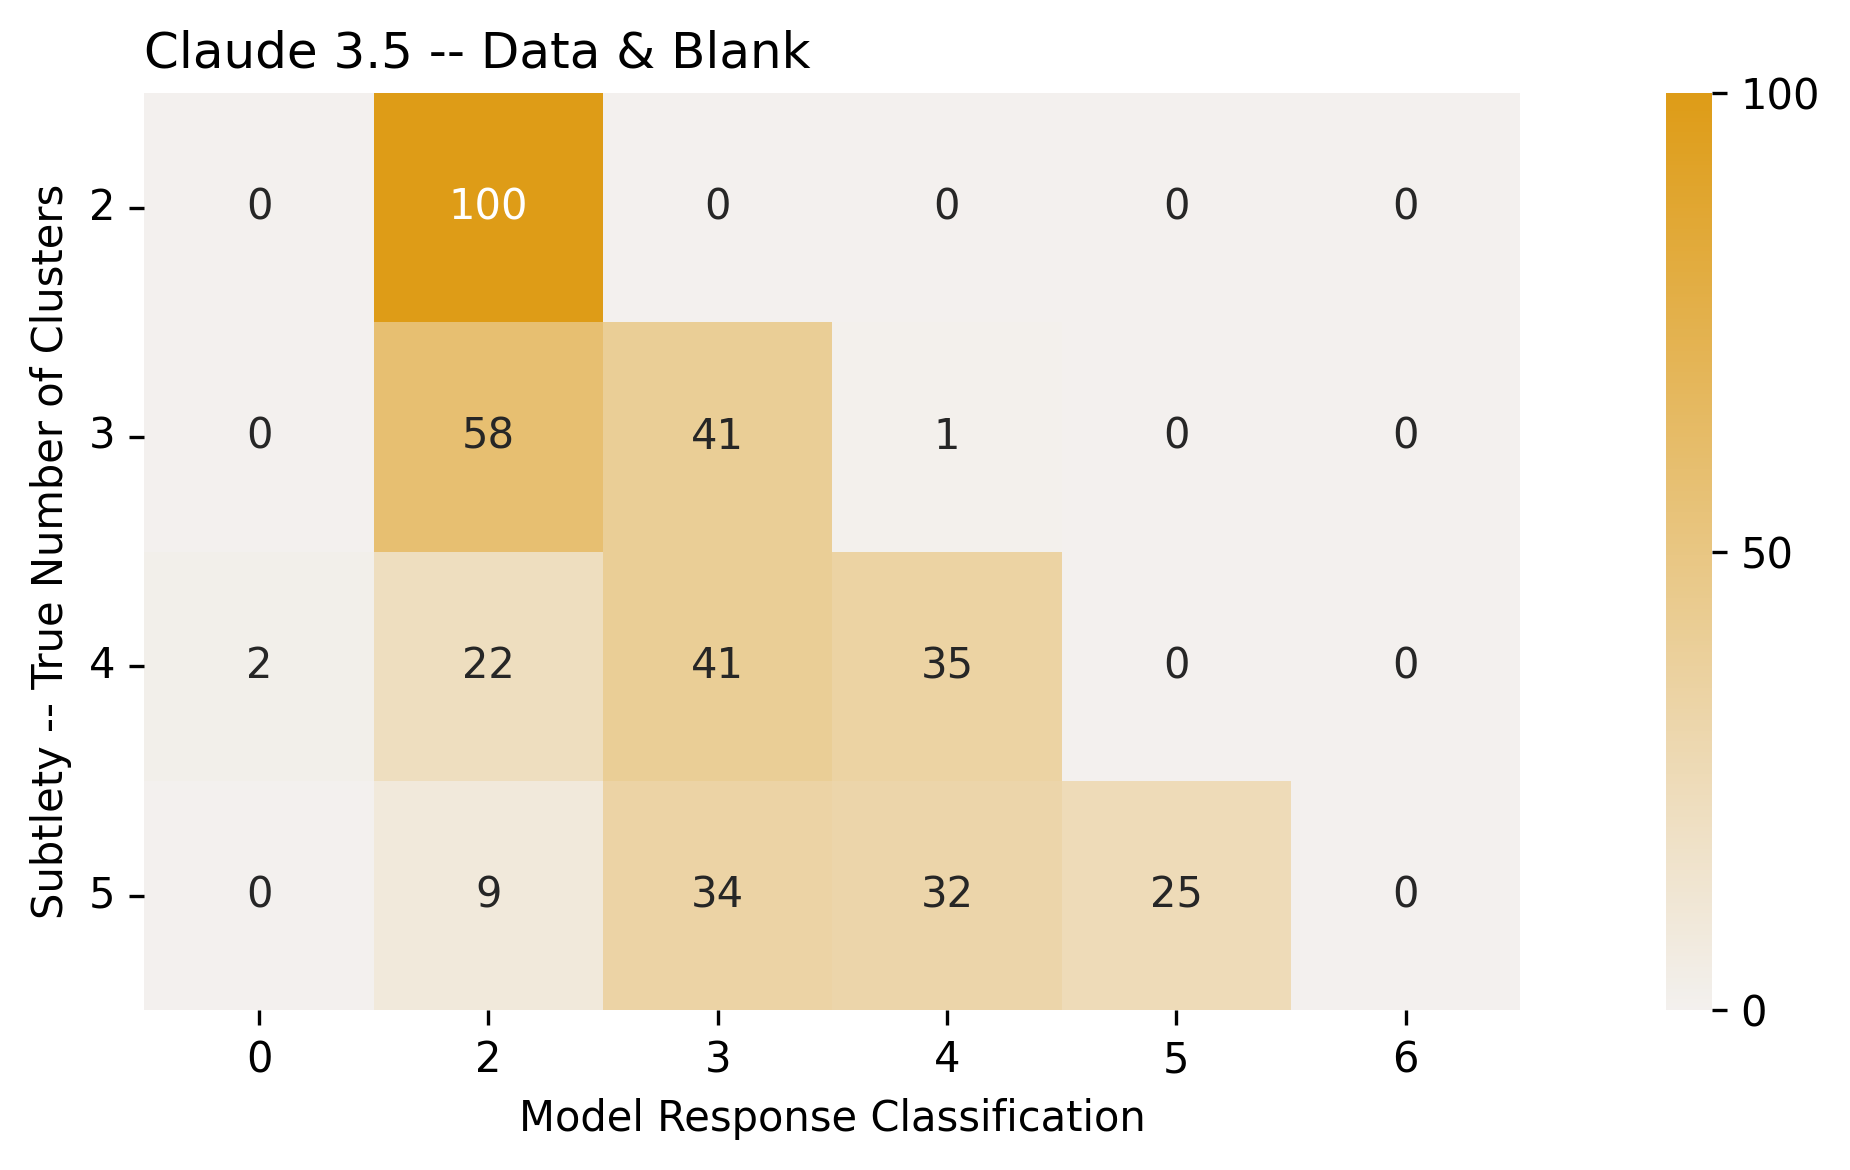

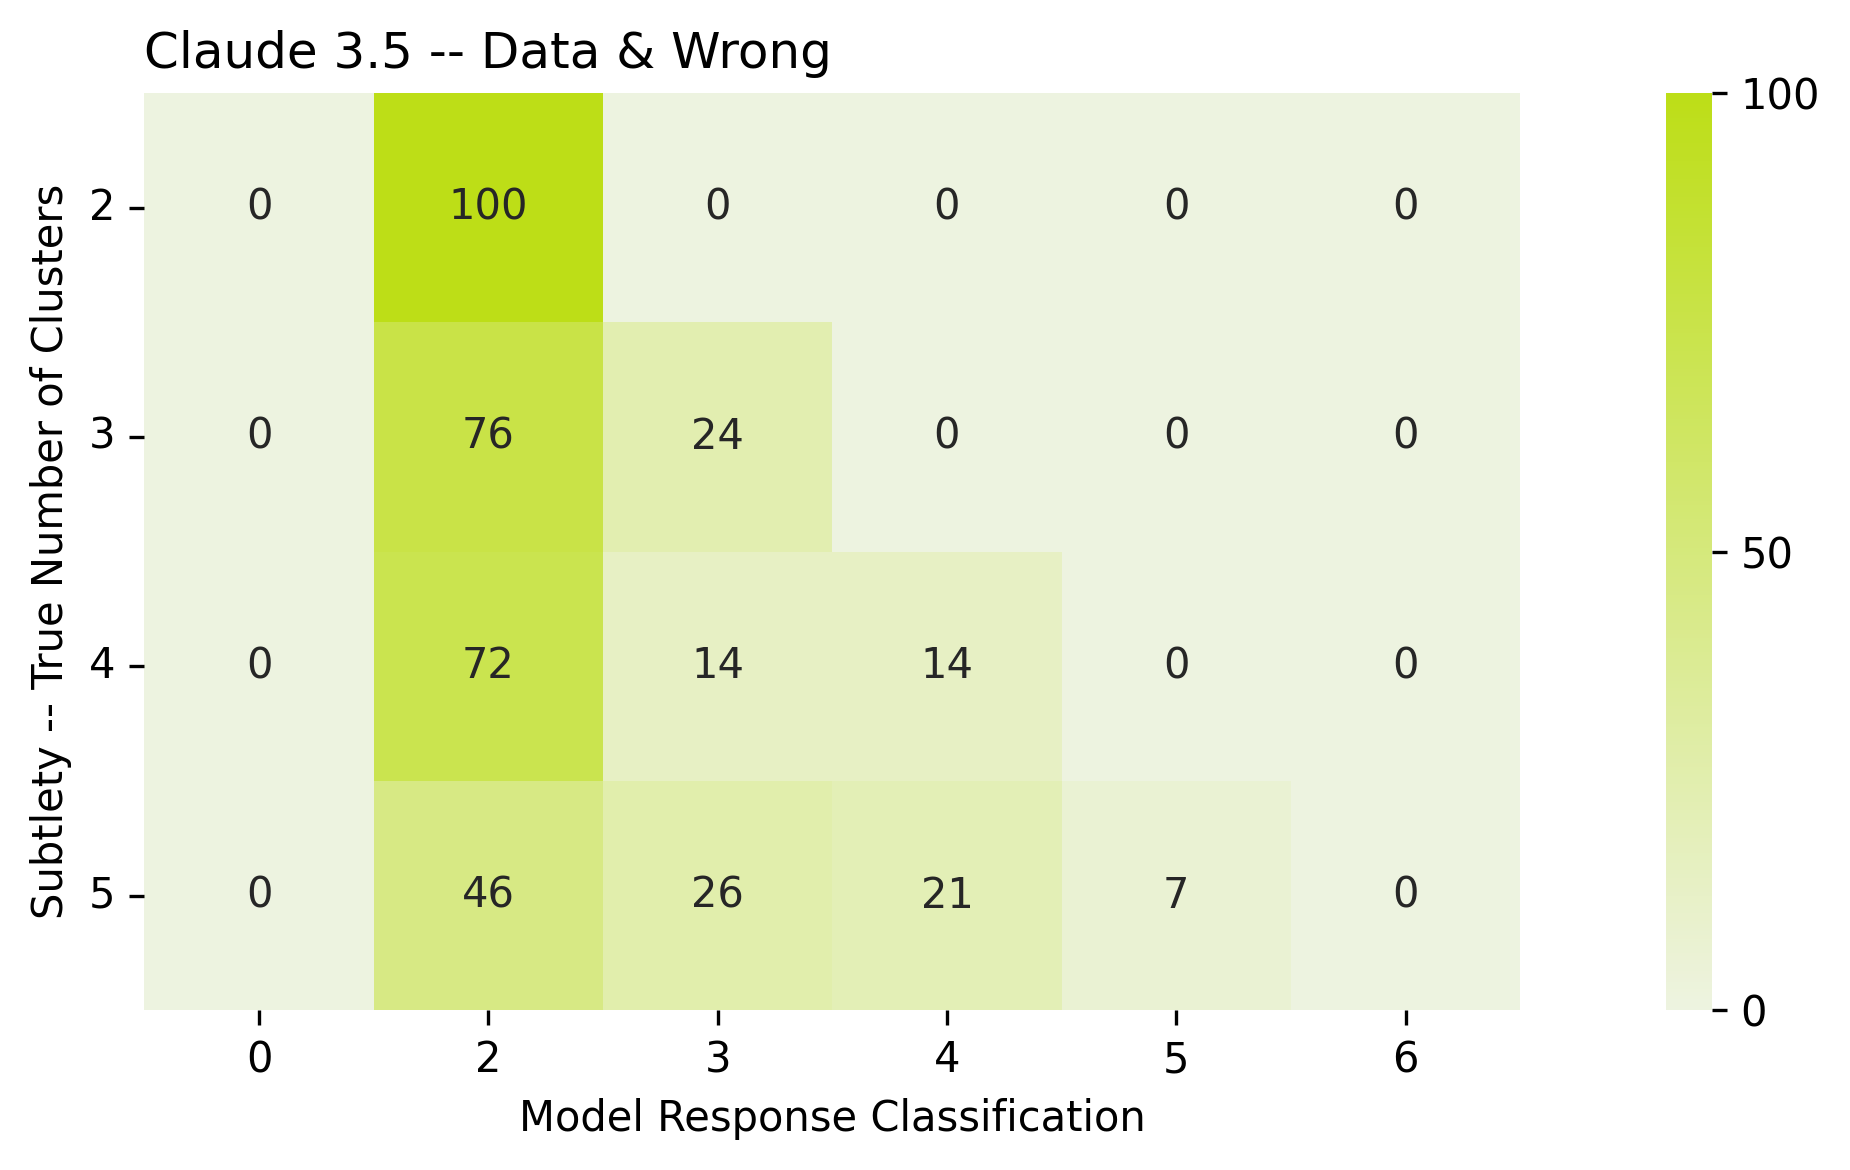

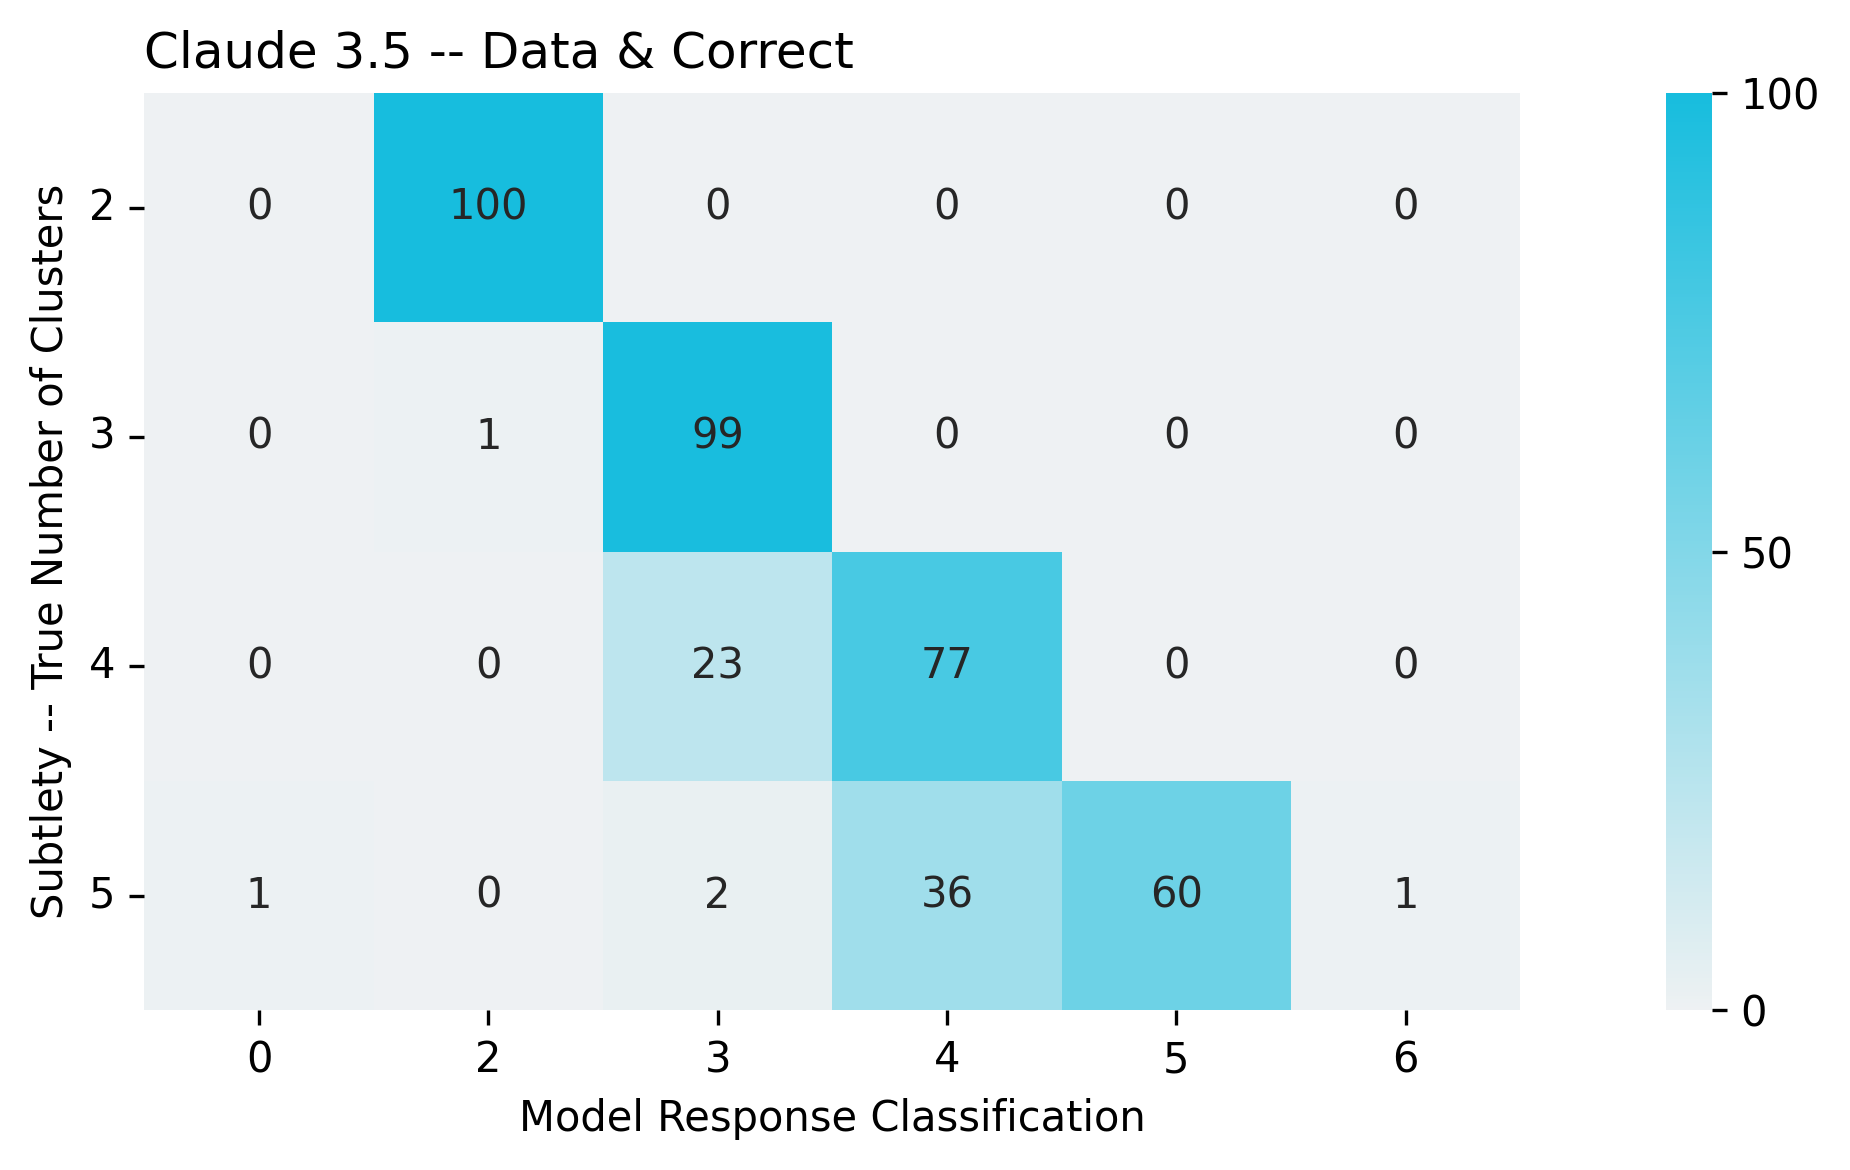

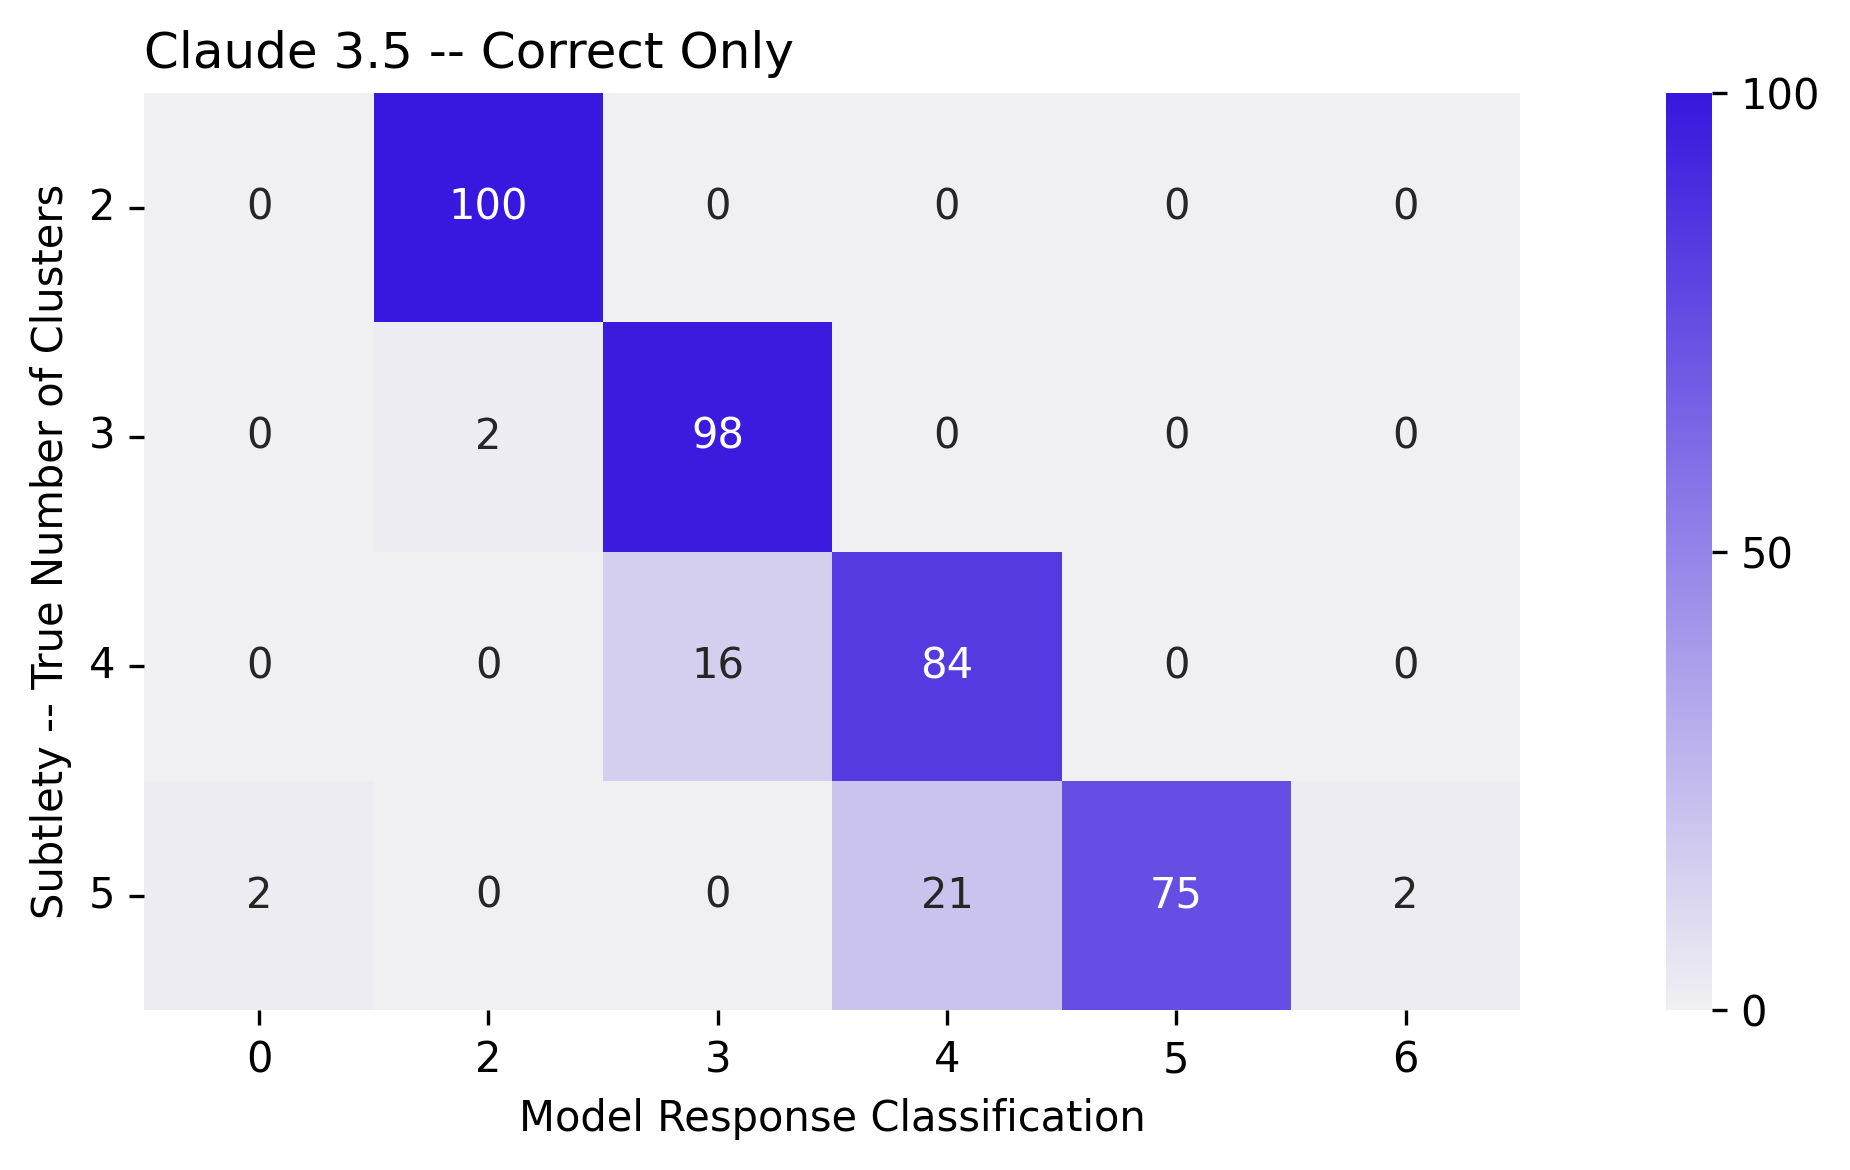

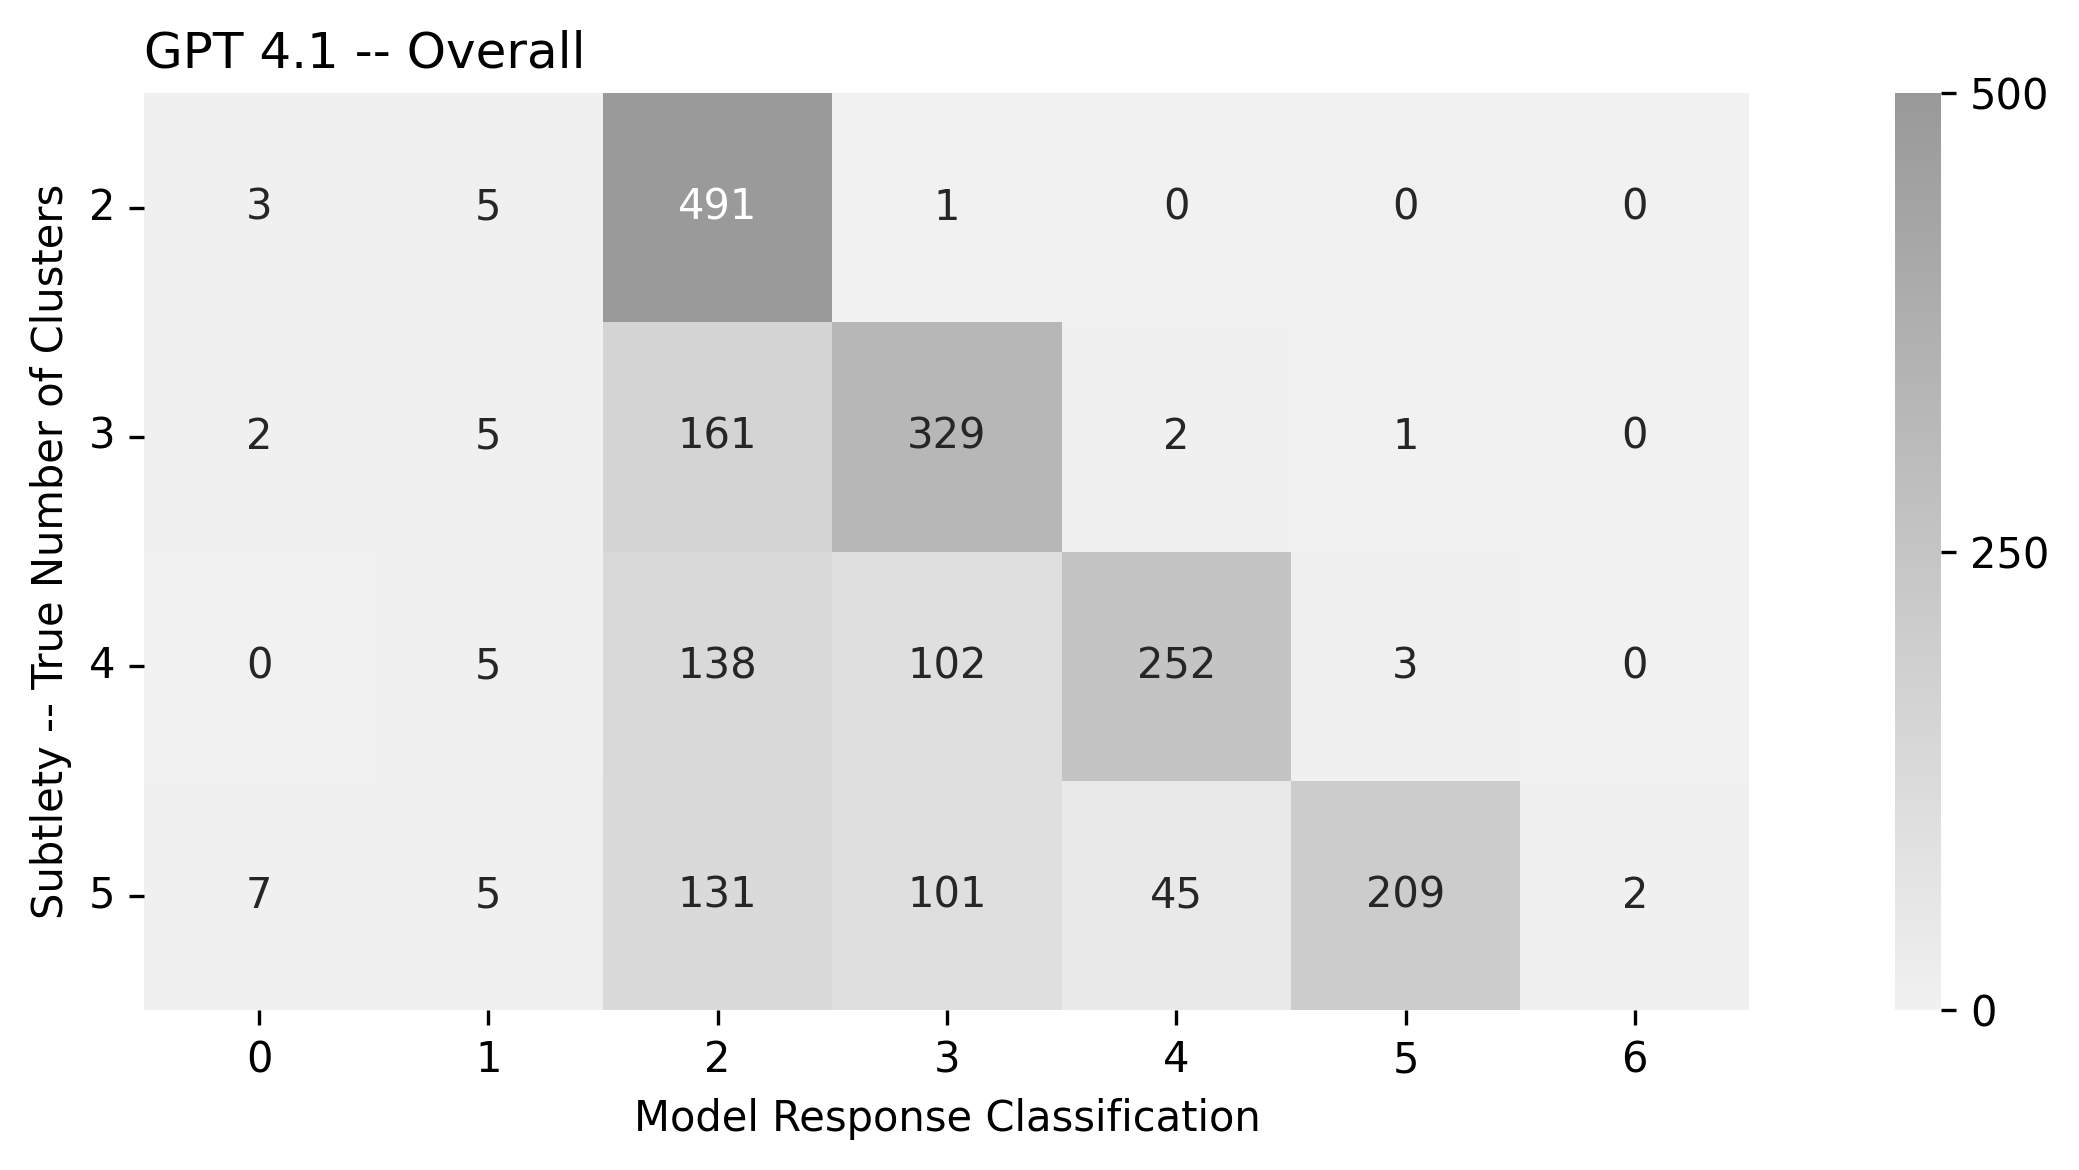

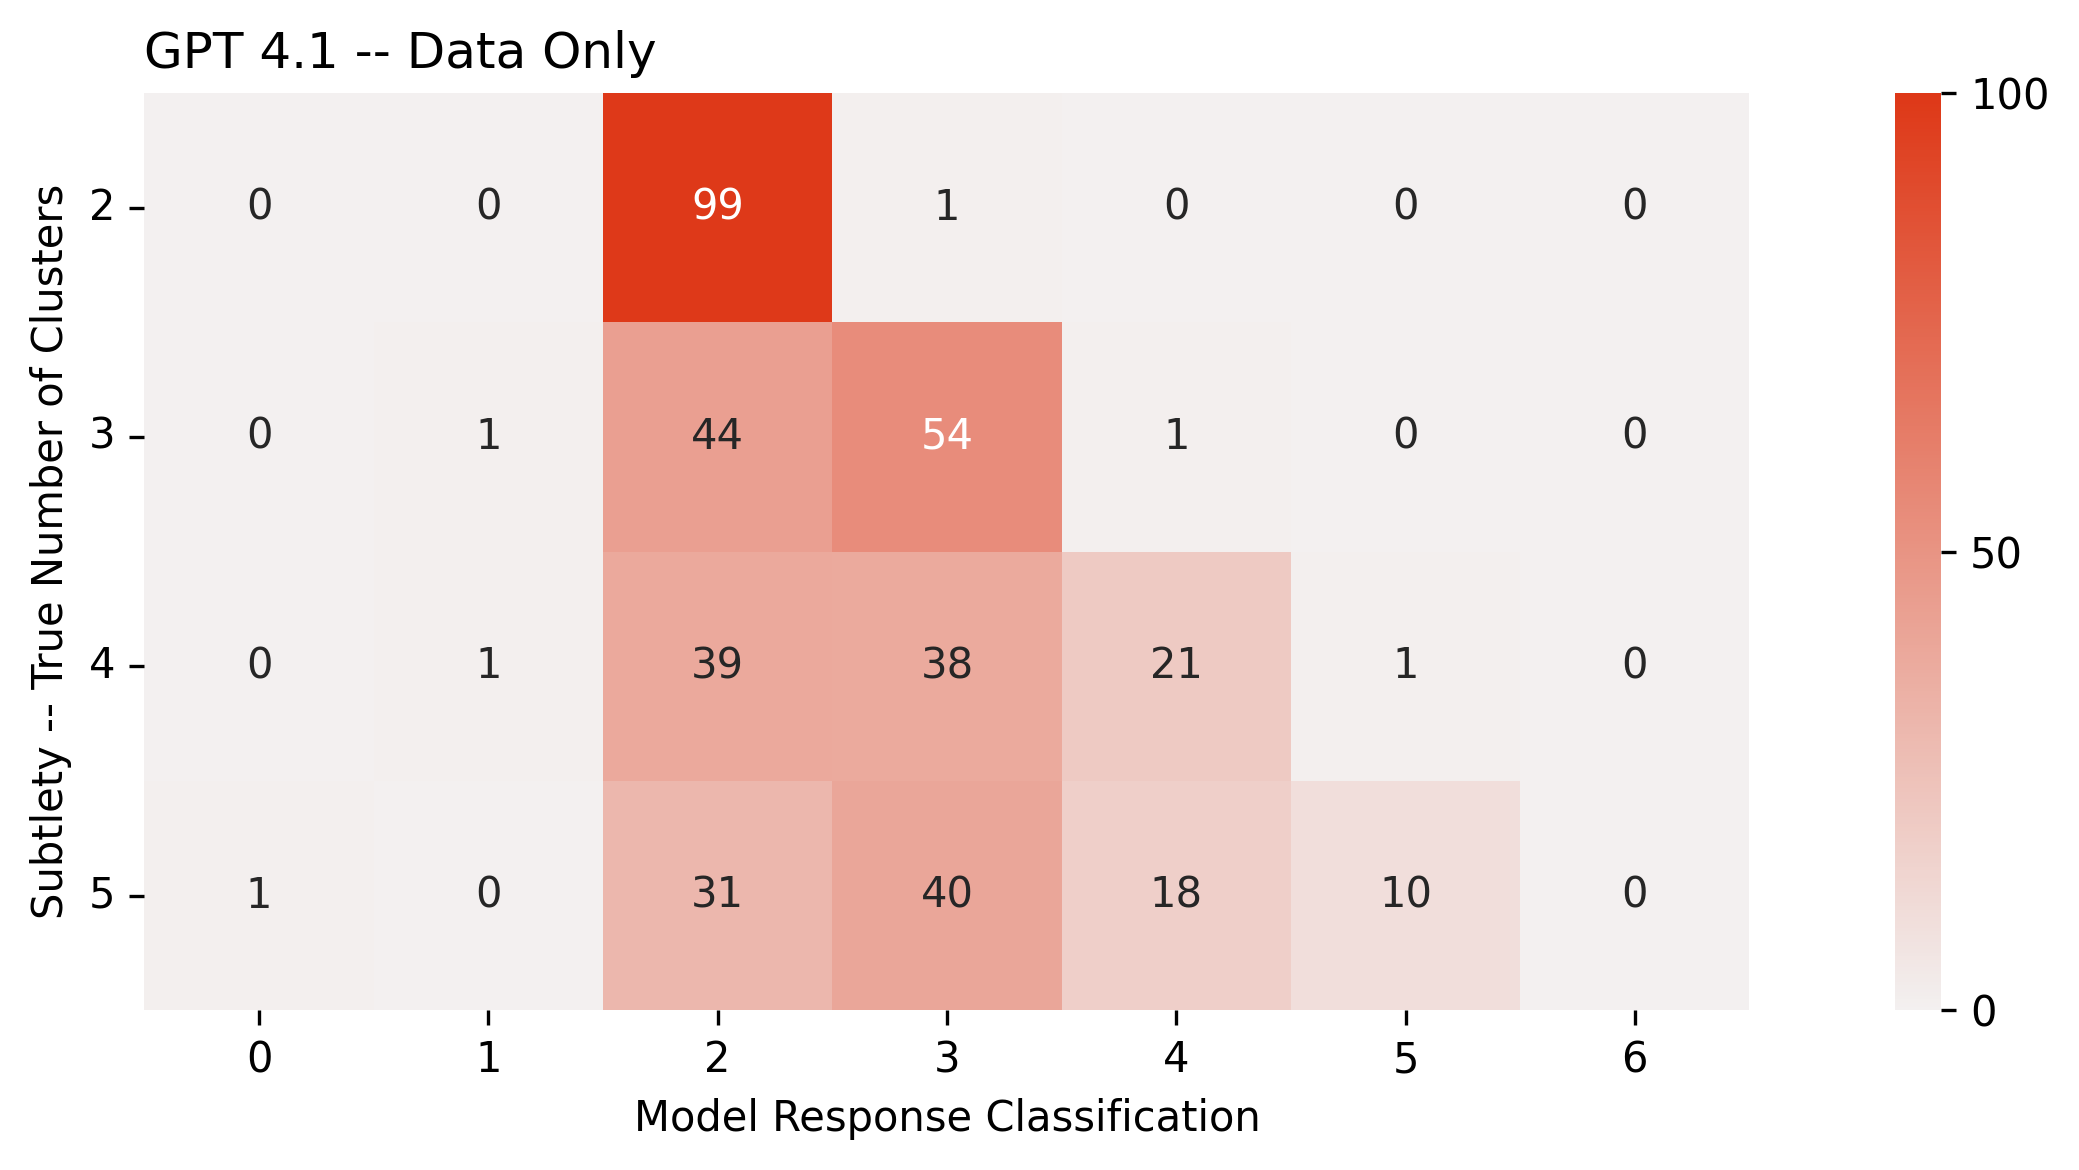

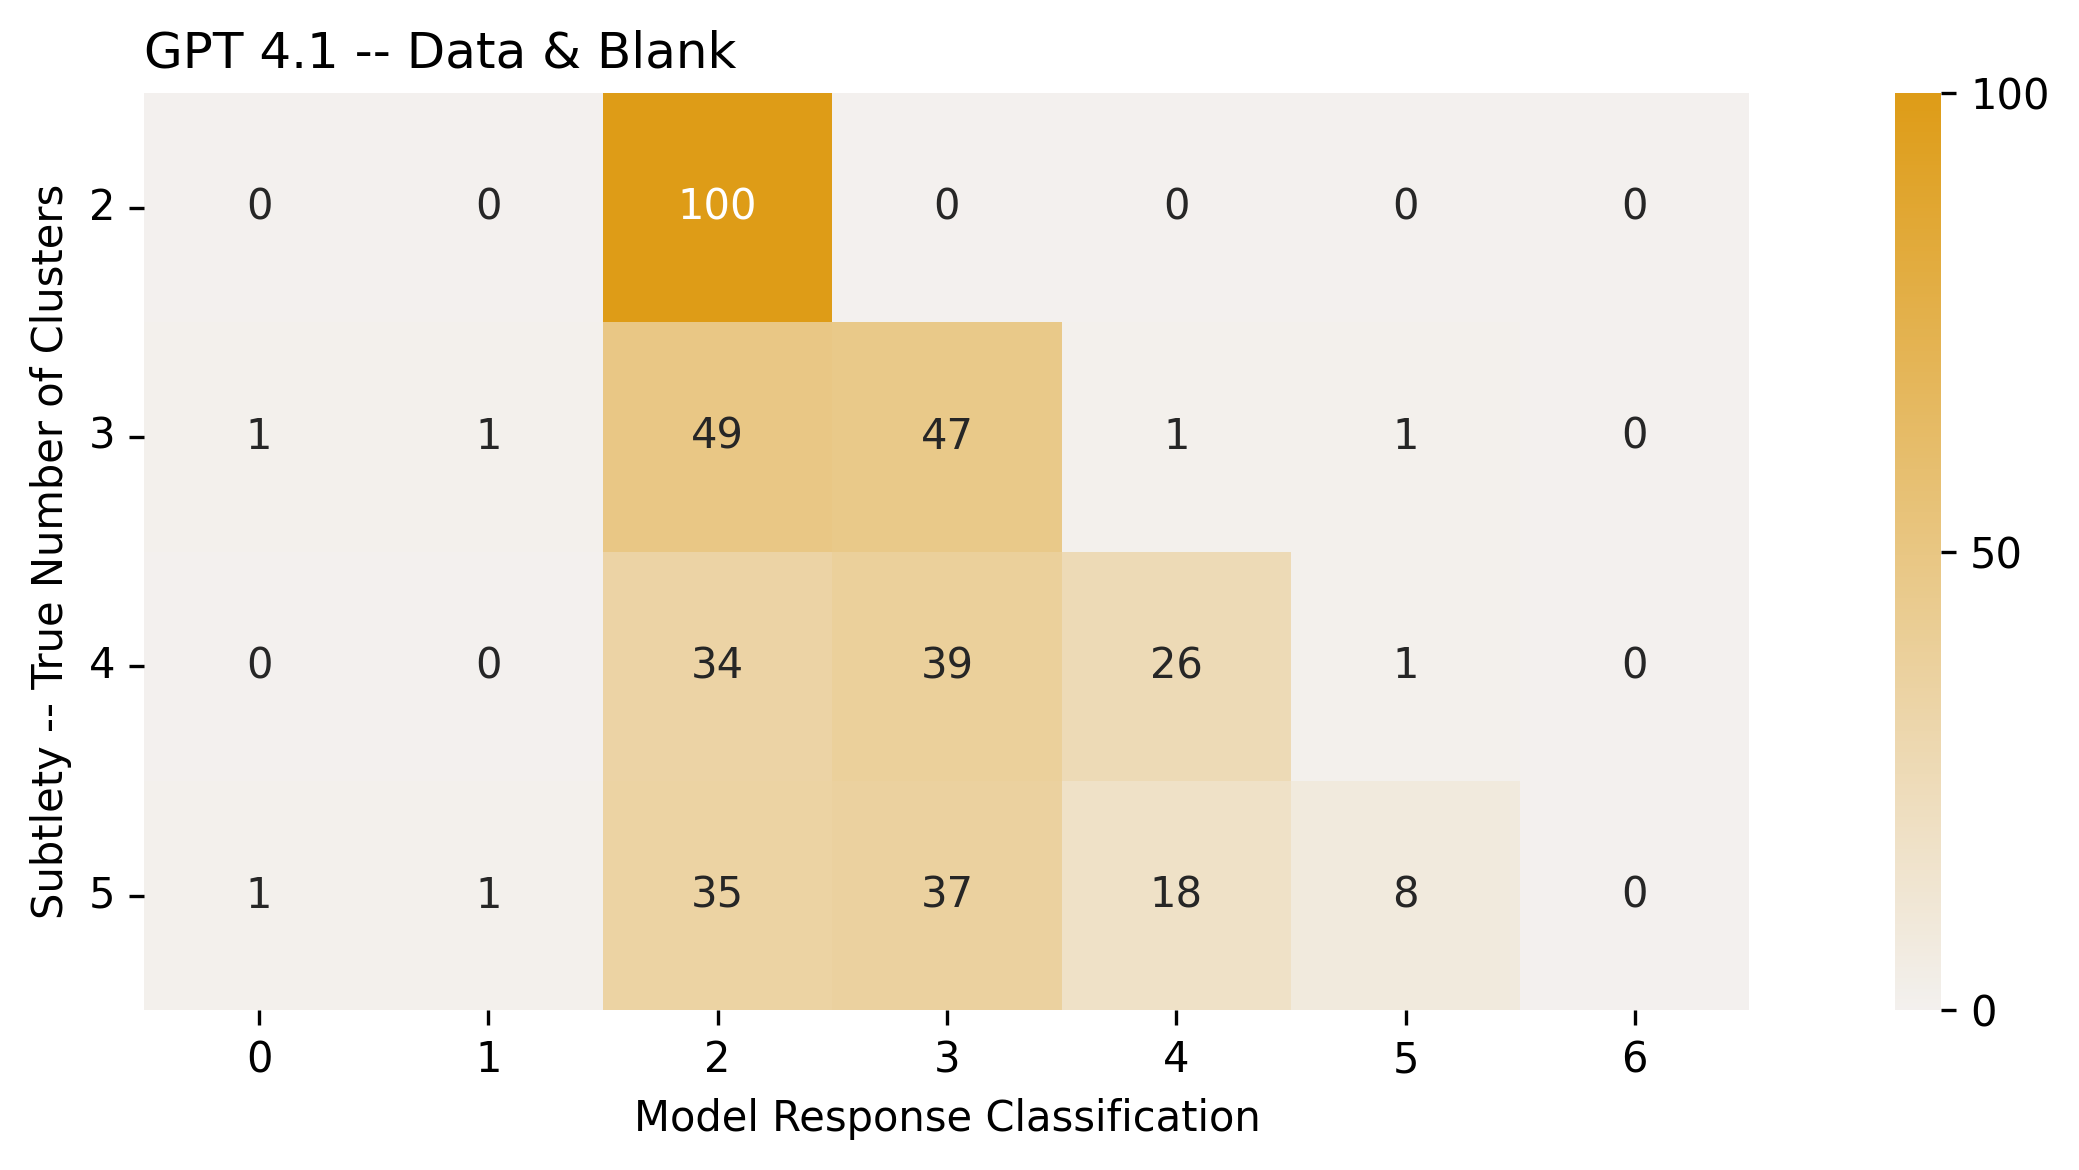

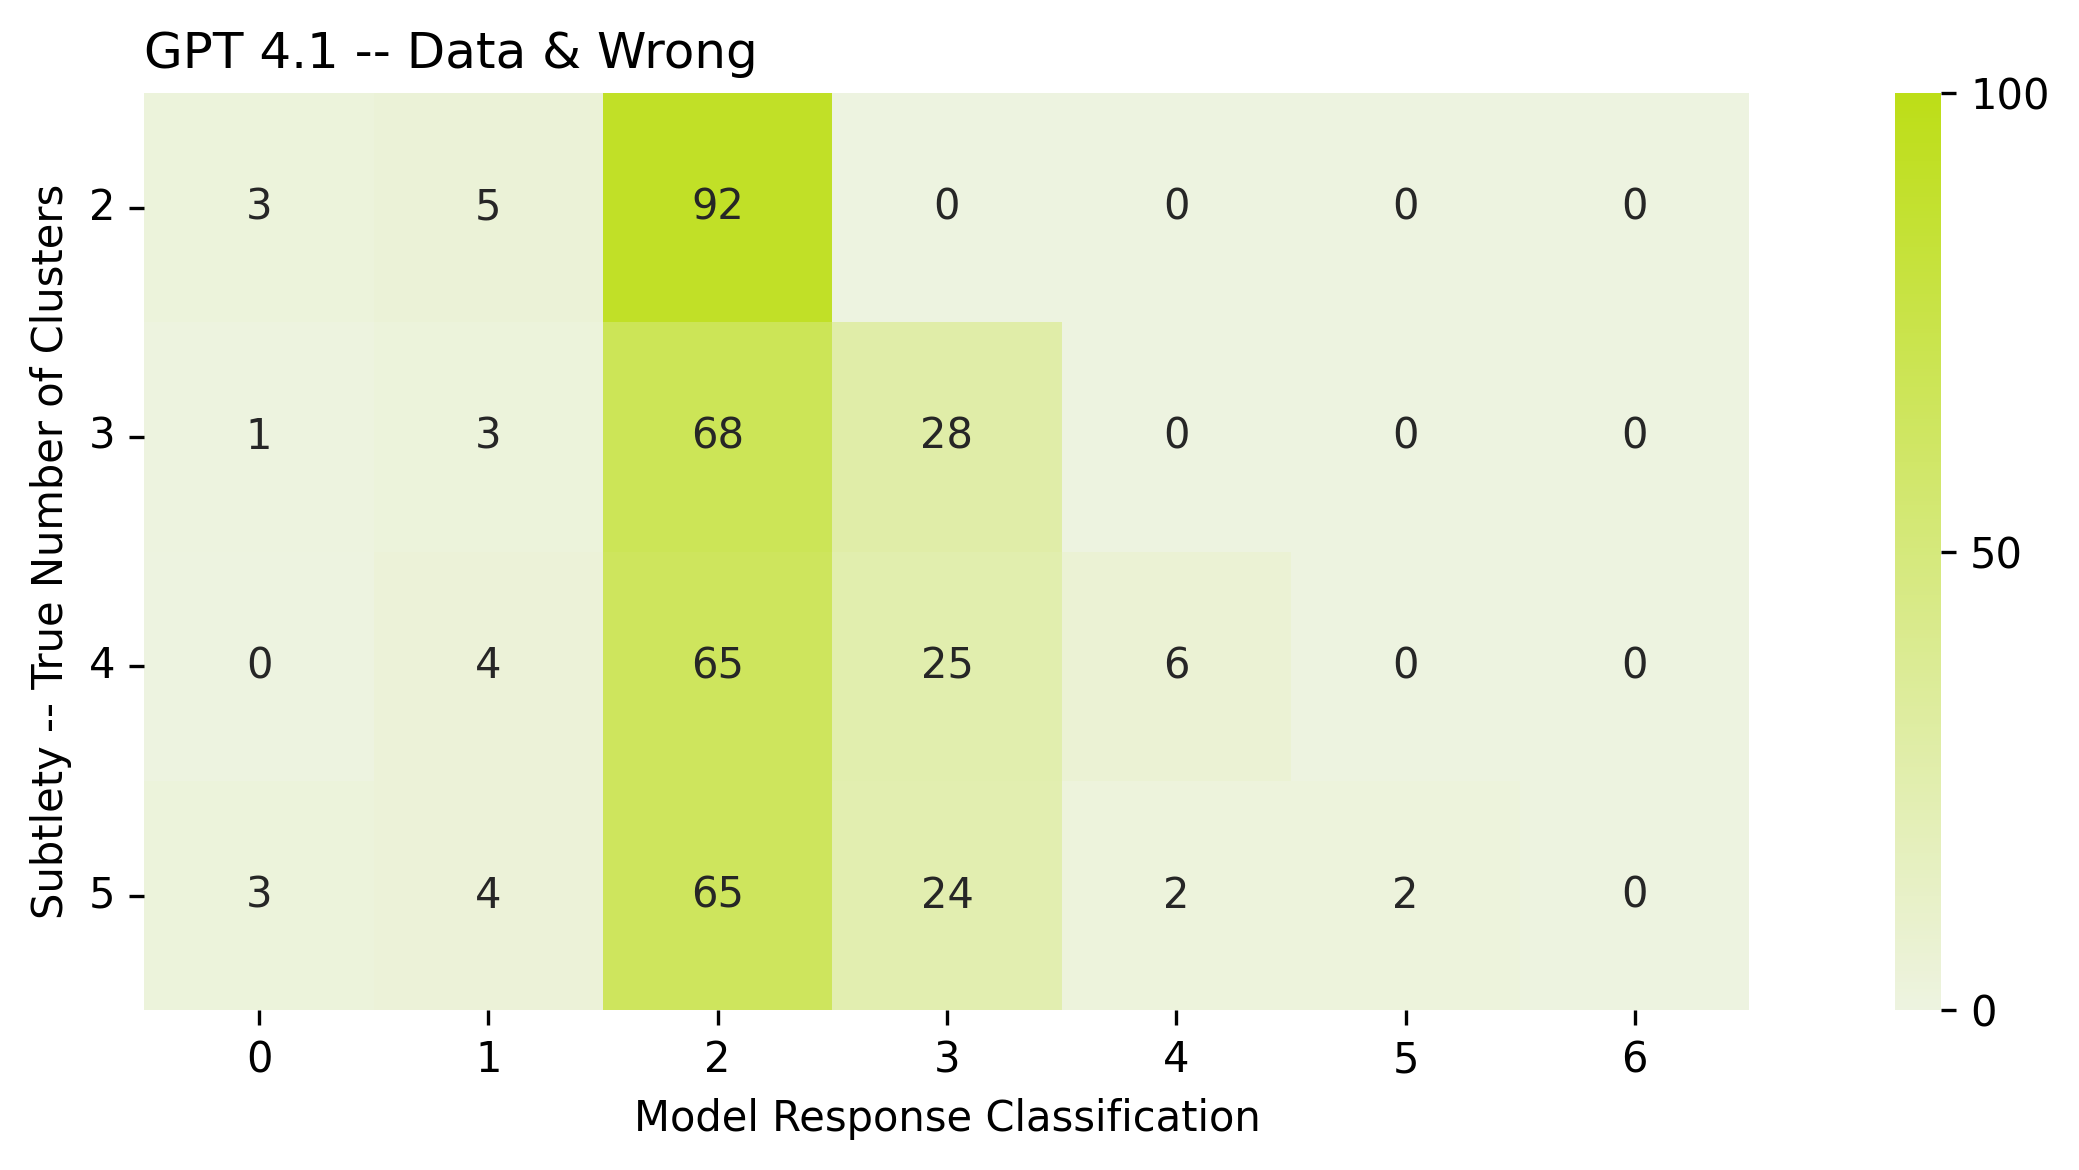

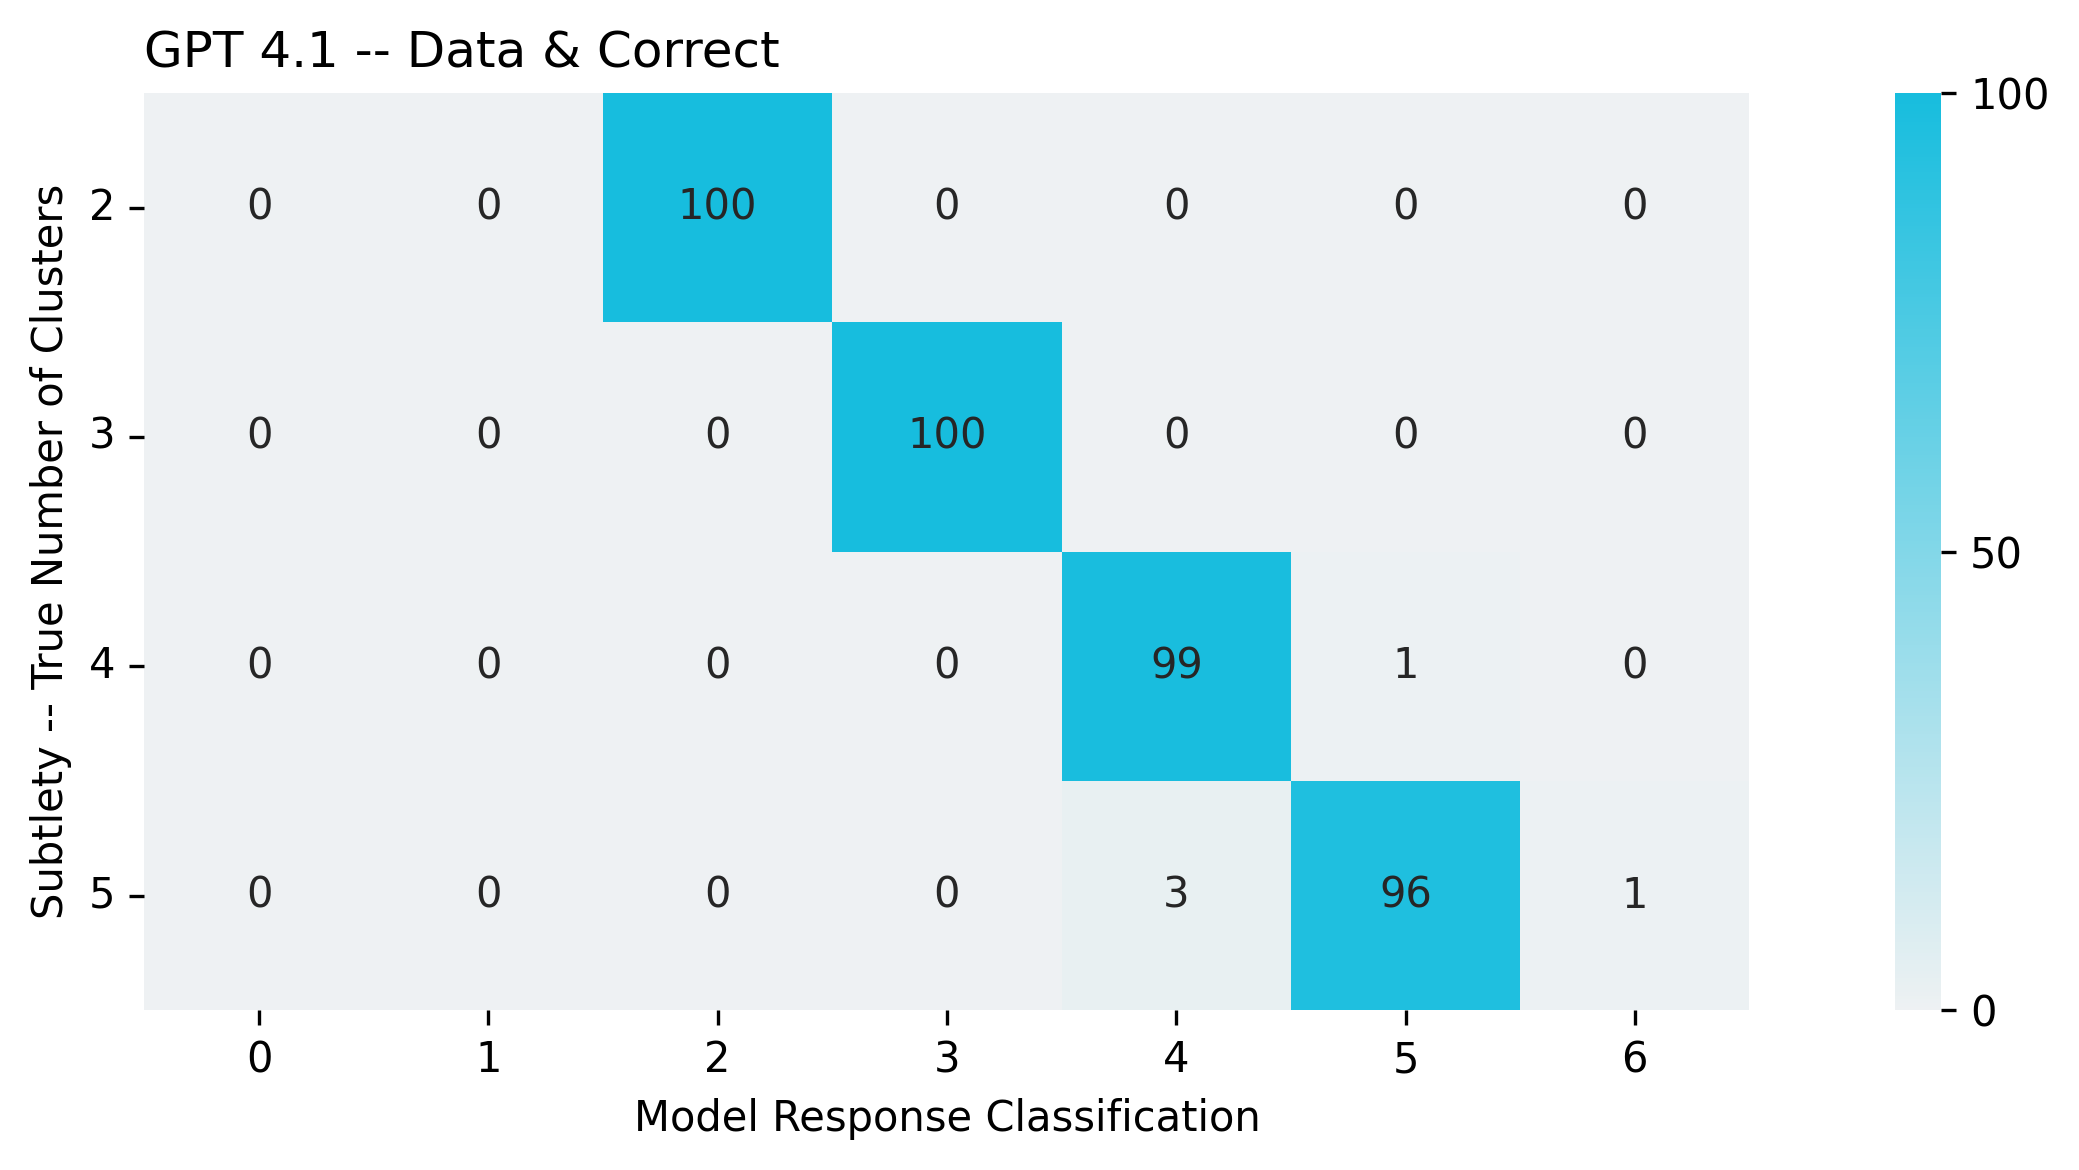

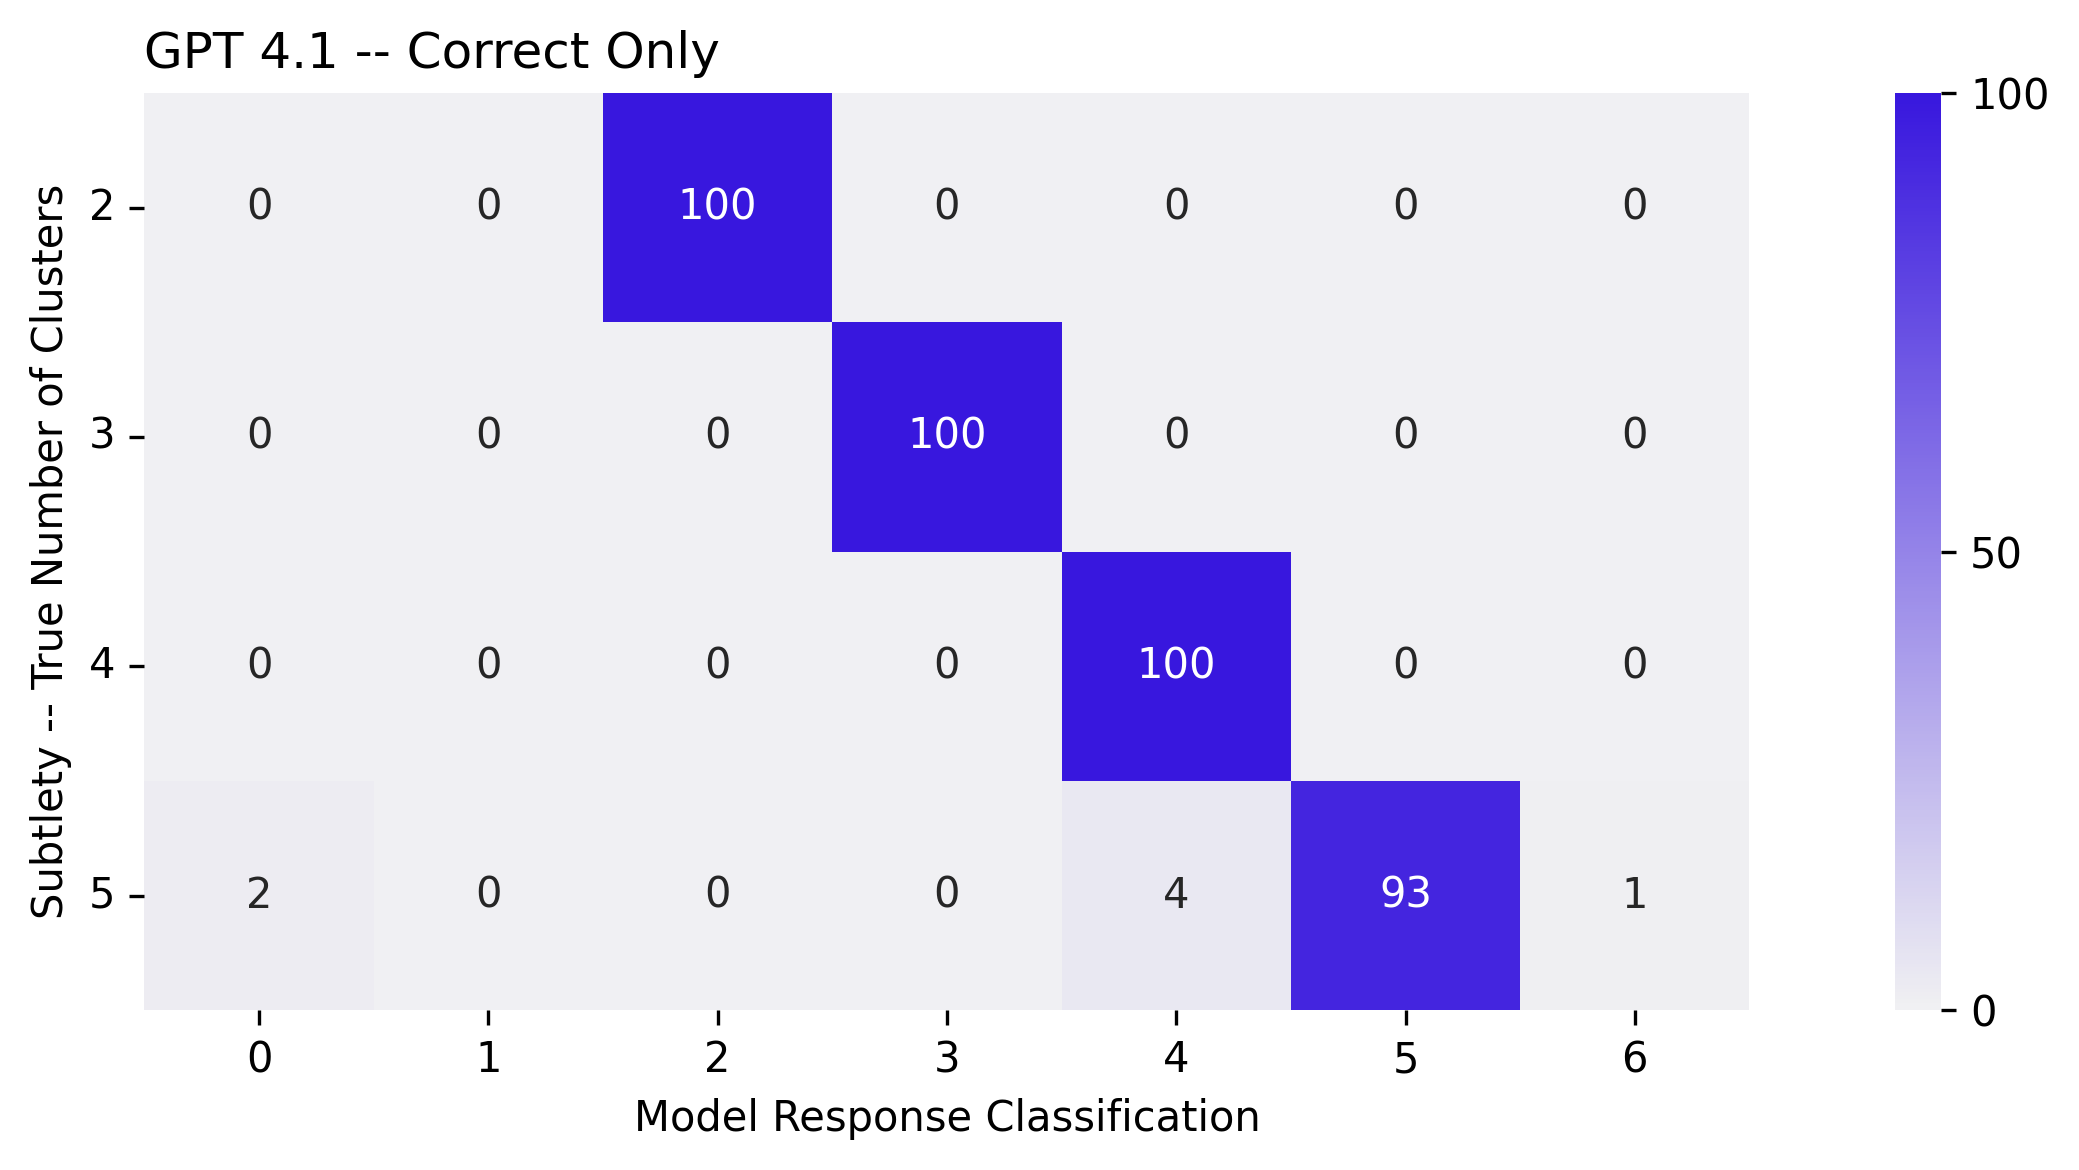

In [3]:
cluster_df = get_clusters_df(success_analysis=False)
for model in cluster_df['model'].unique():
    for condition in [None] + list(condition_rename_map.keys()):
        get_confusion_heatmap(cluster_df, model, condition, "Subtlety -- True Number of Clusters", "Model Response Classification", save=False)

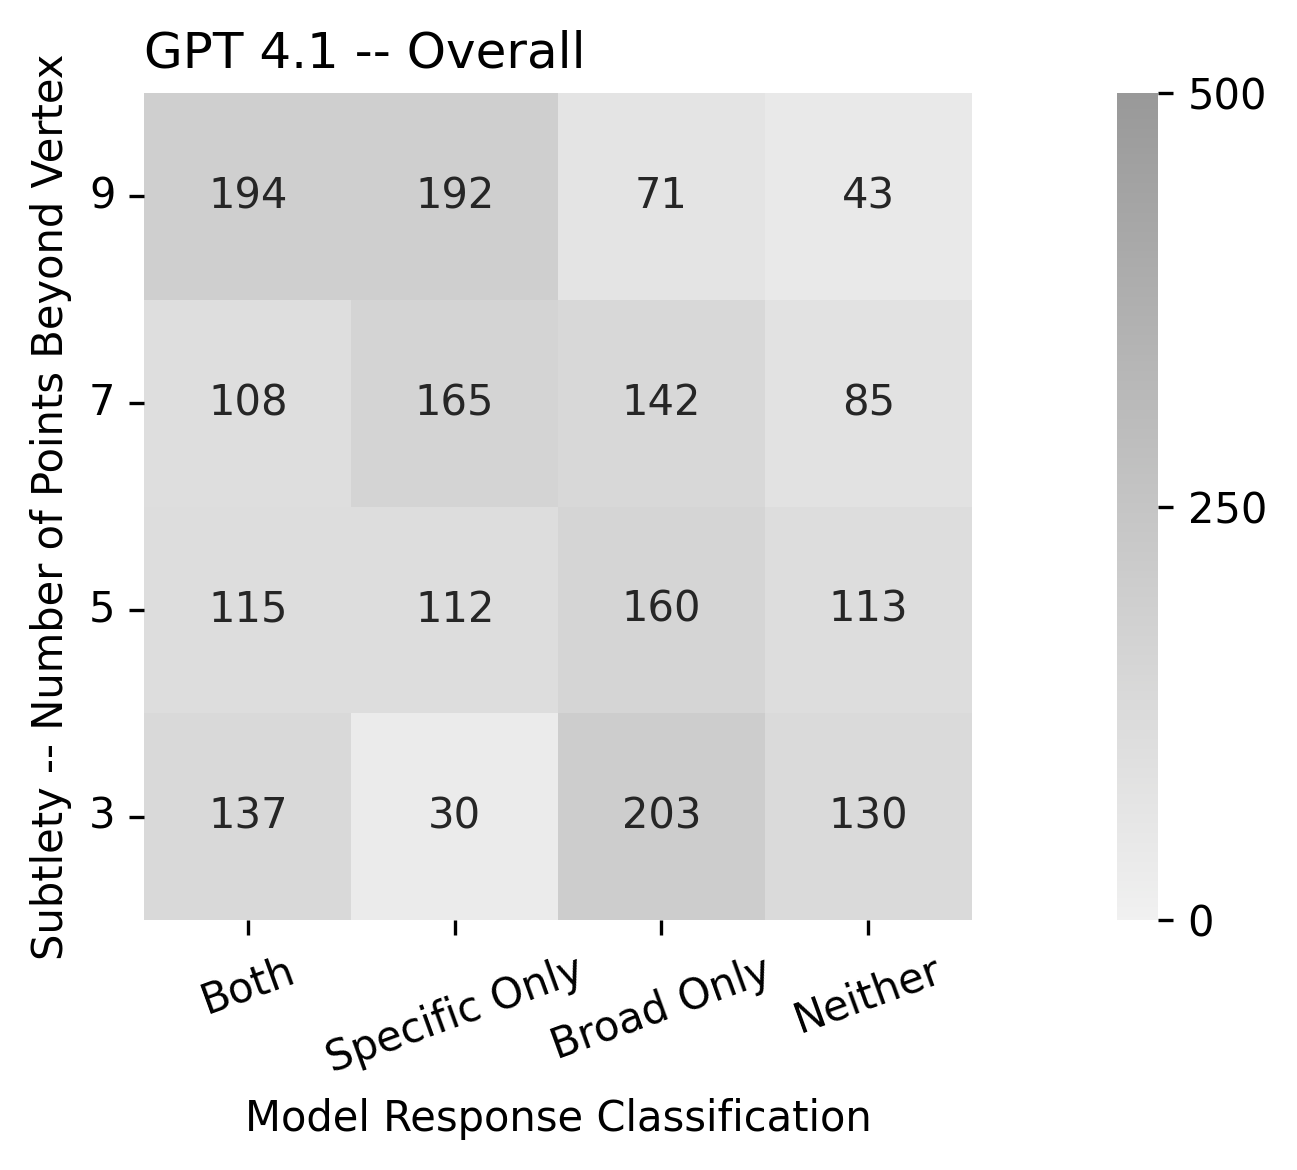

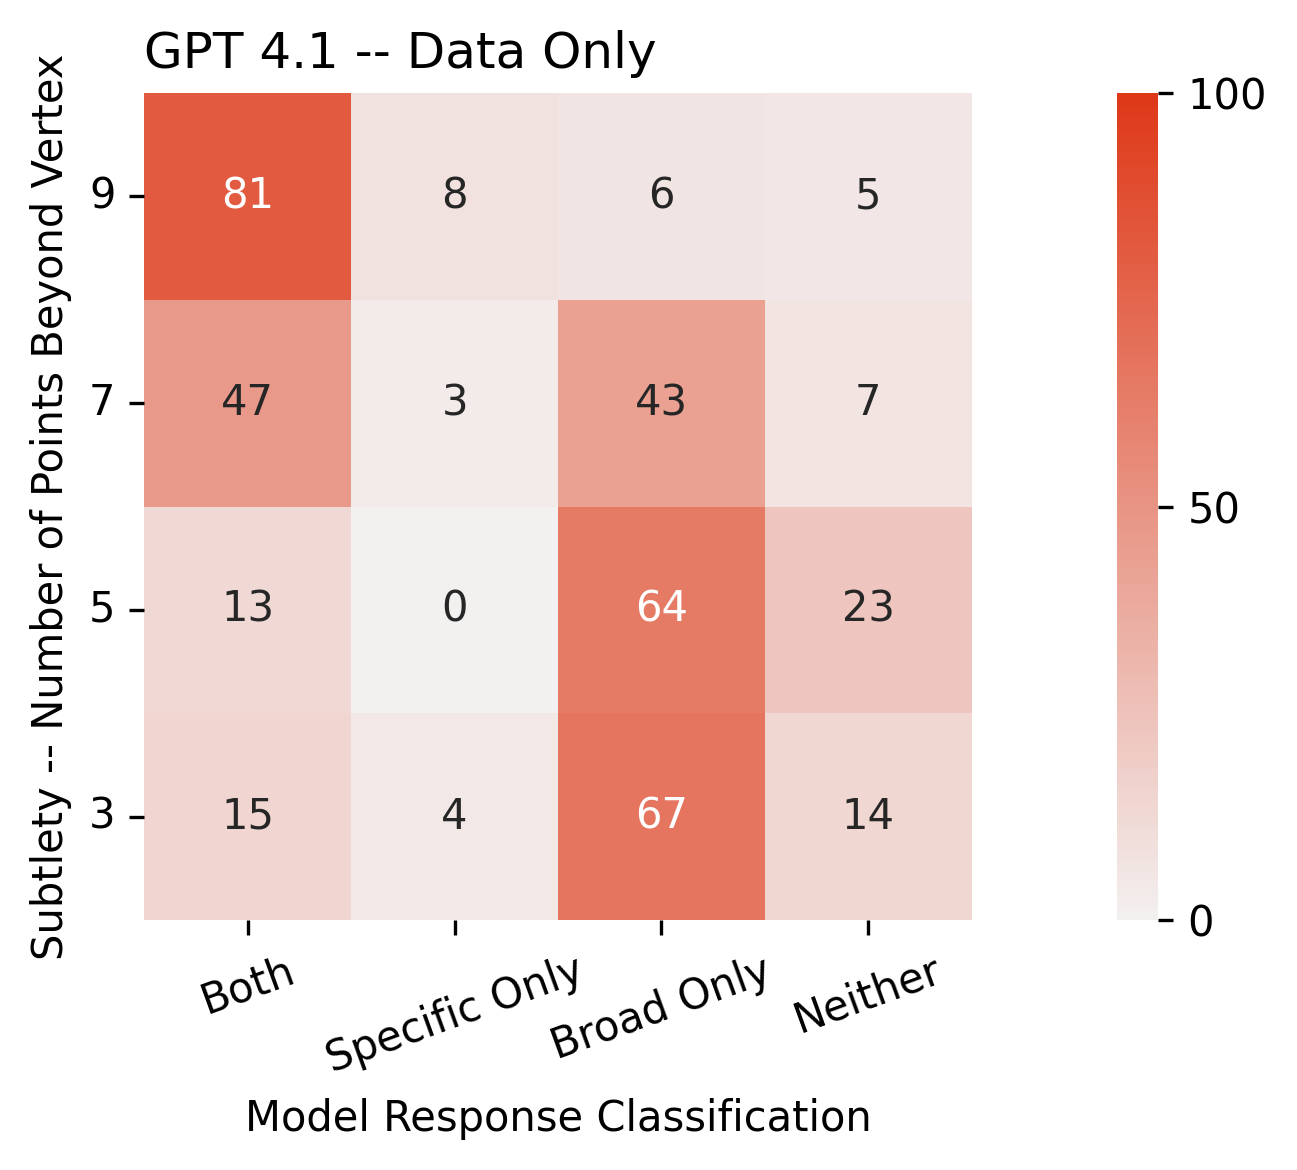

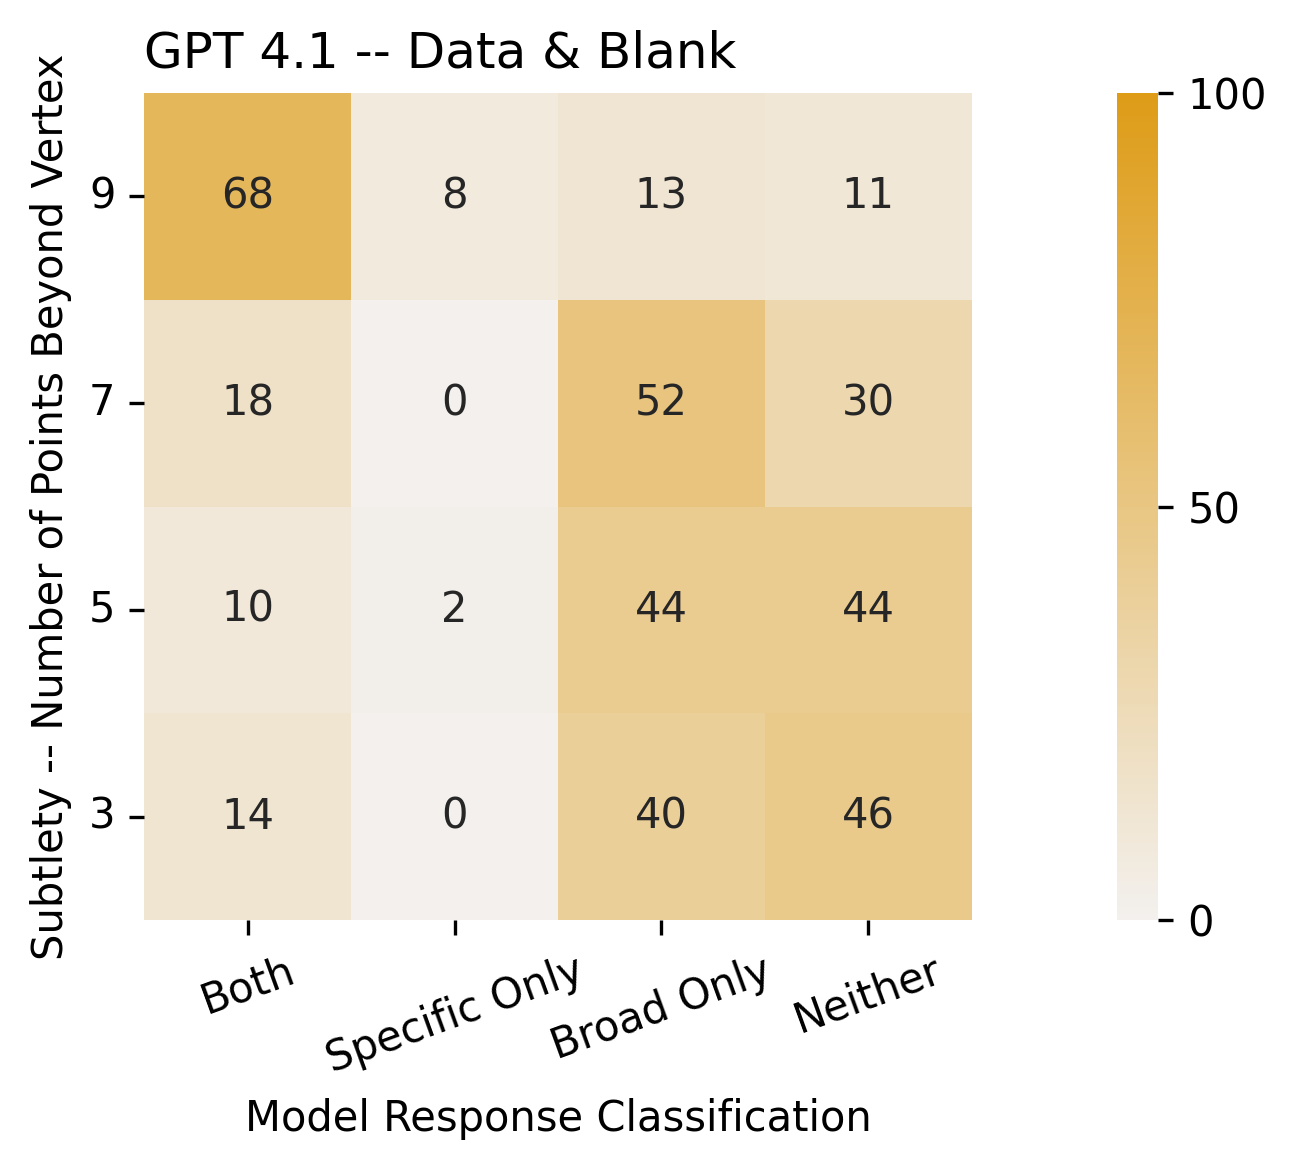

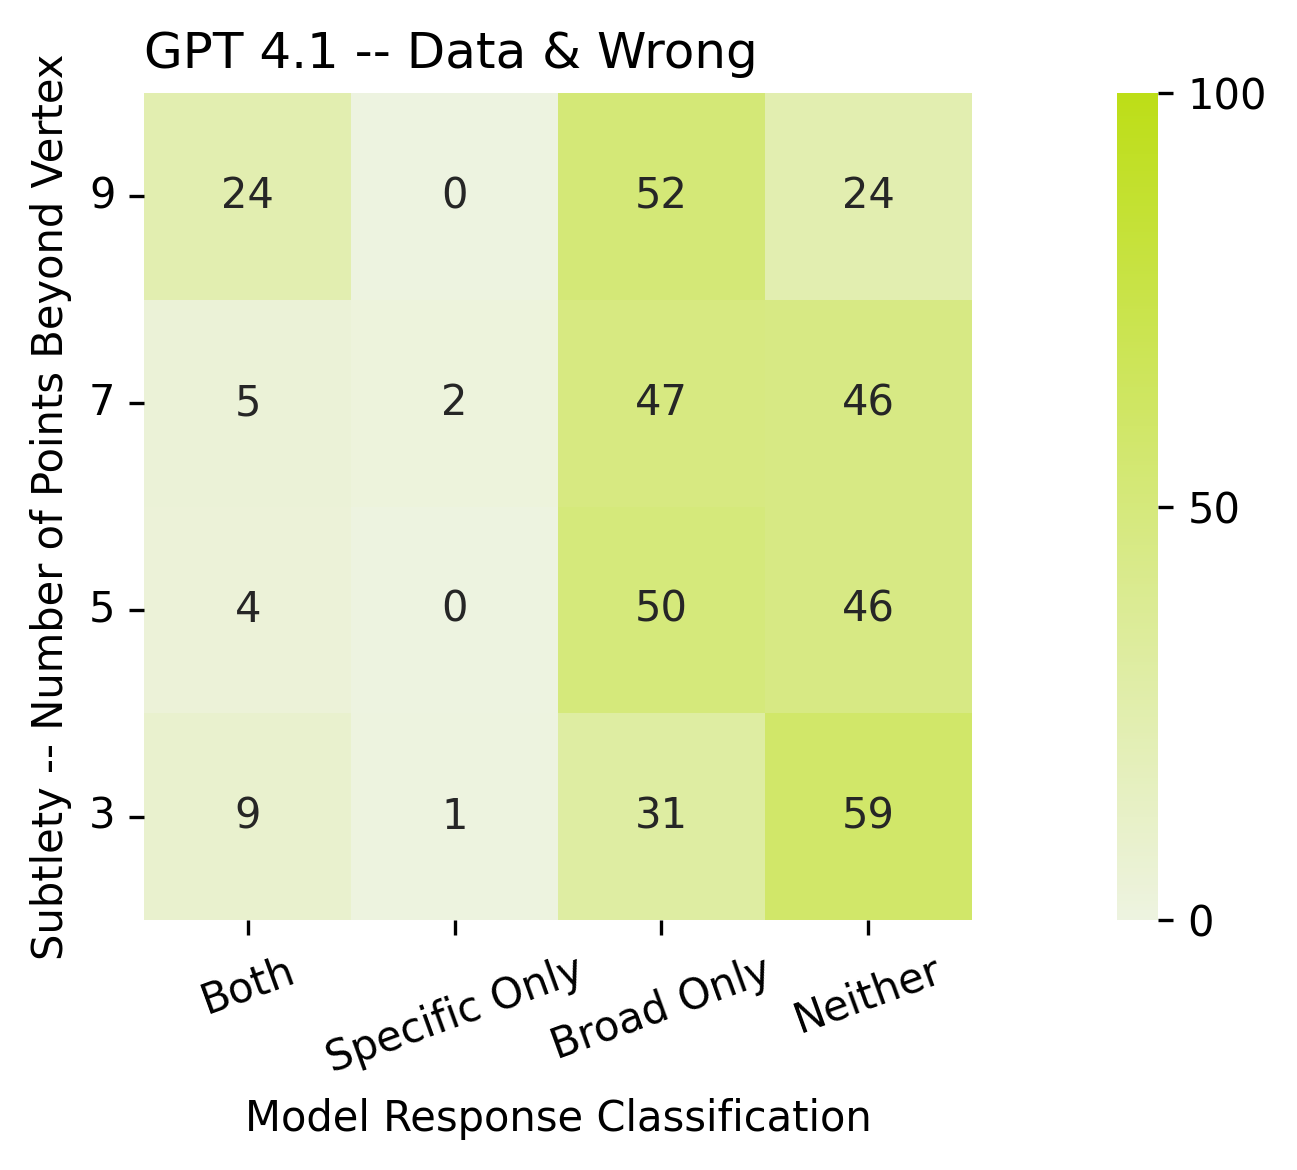

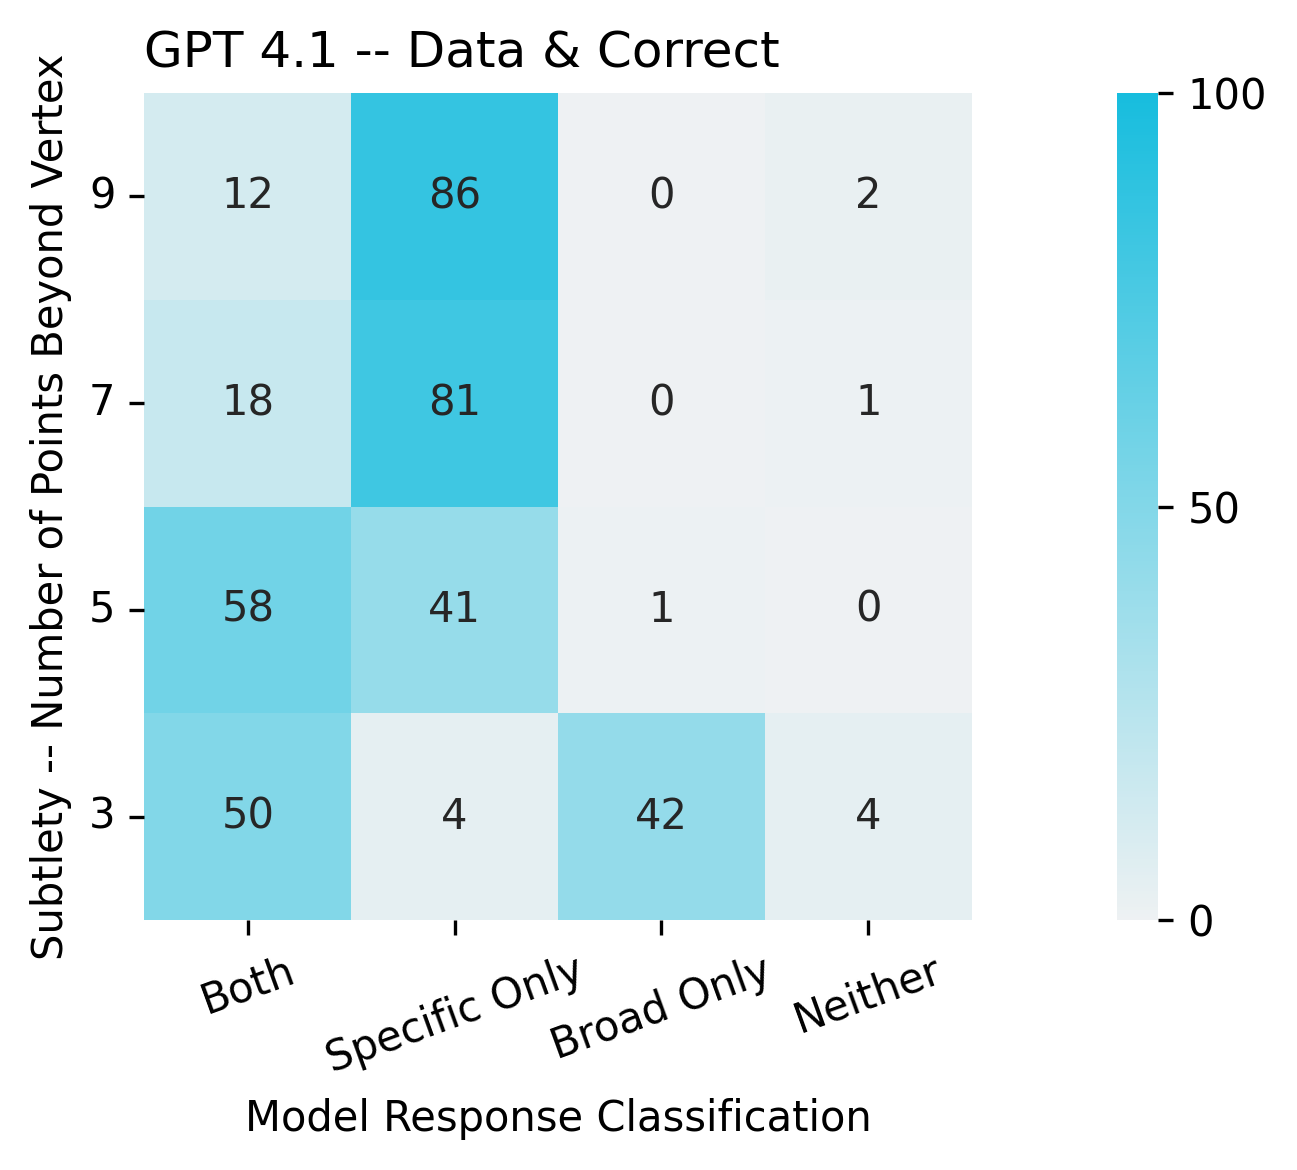

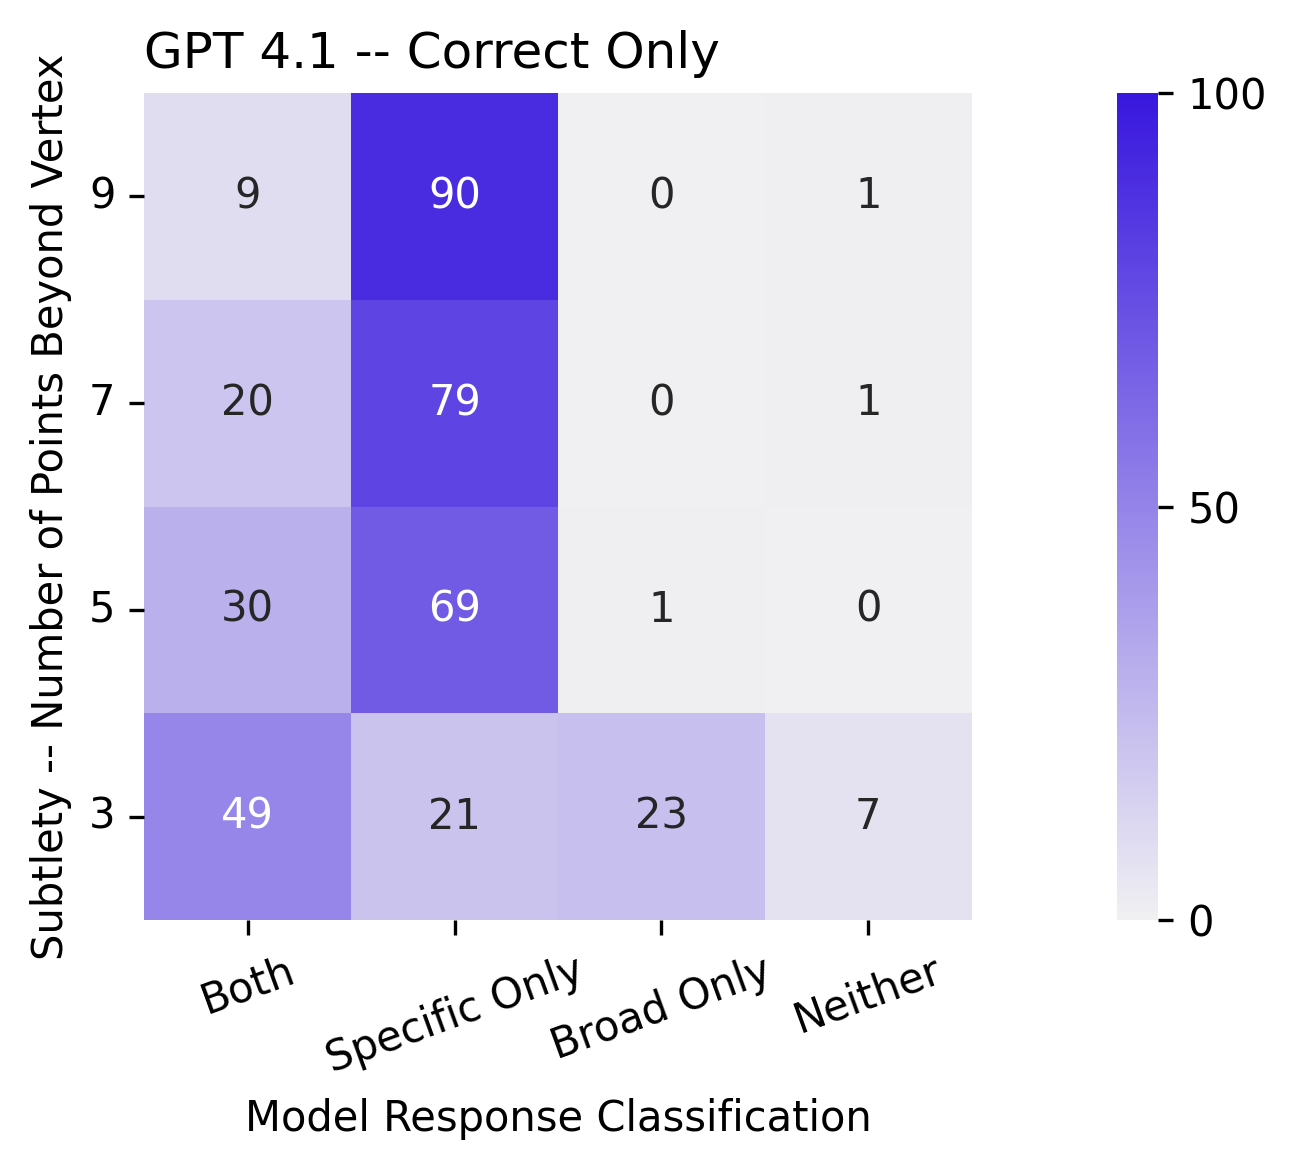

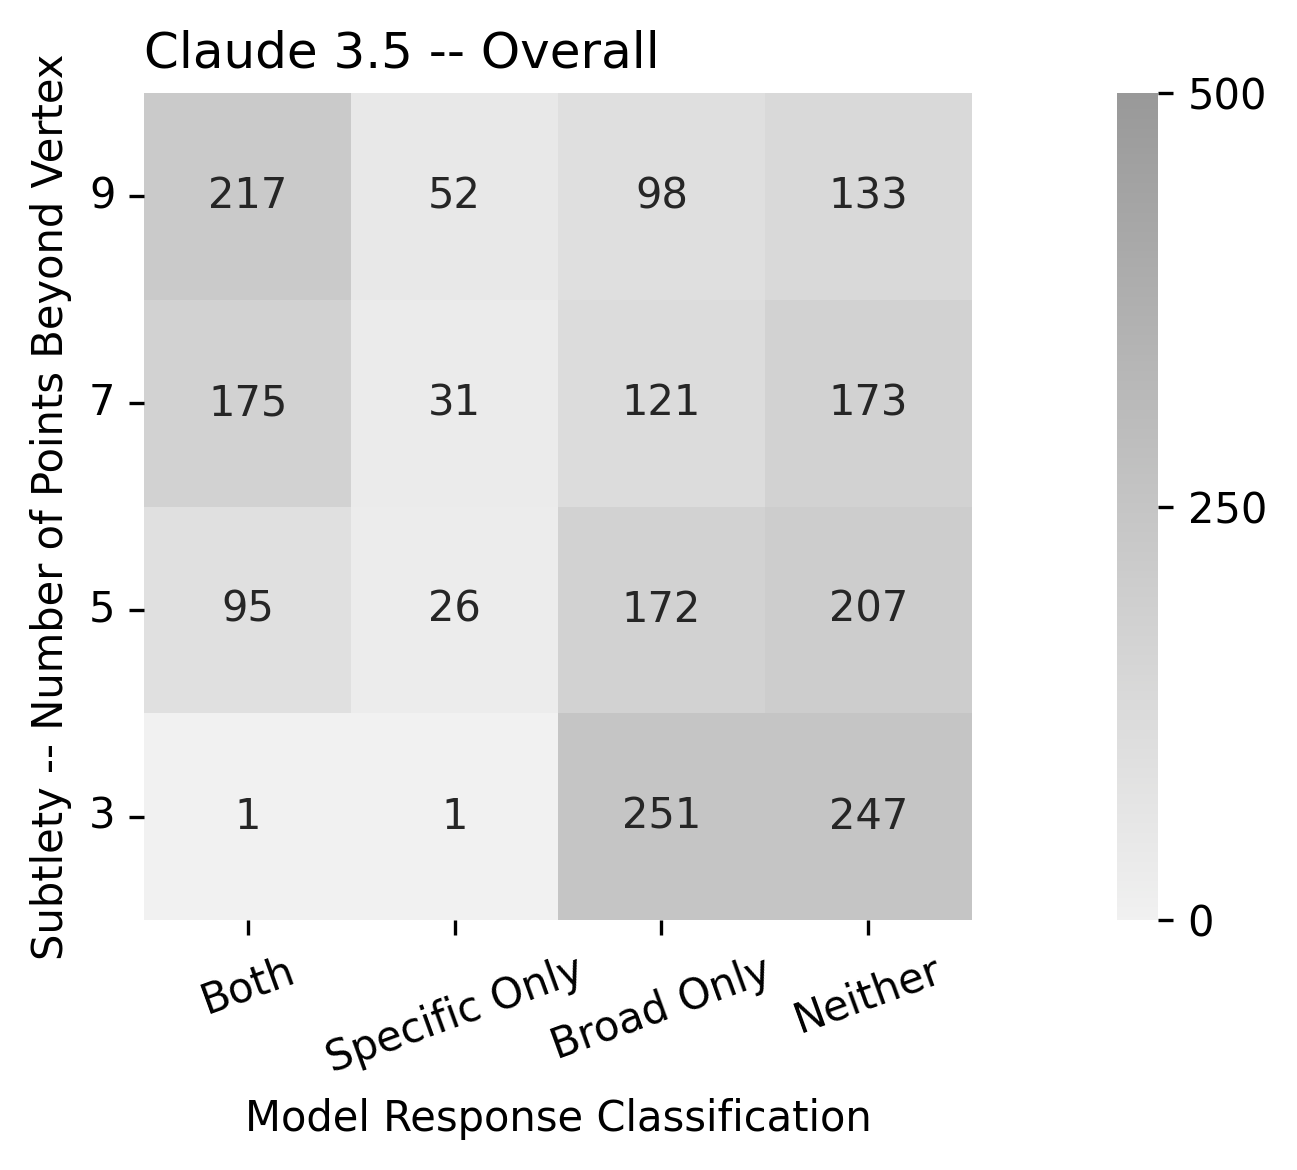

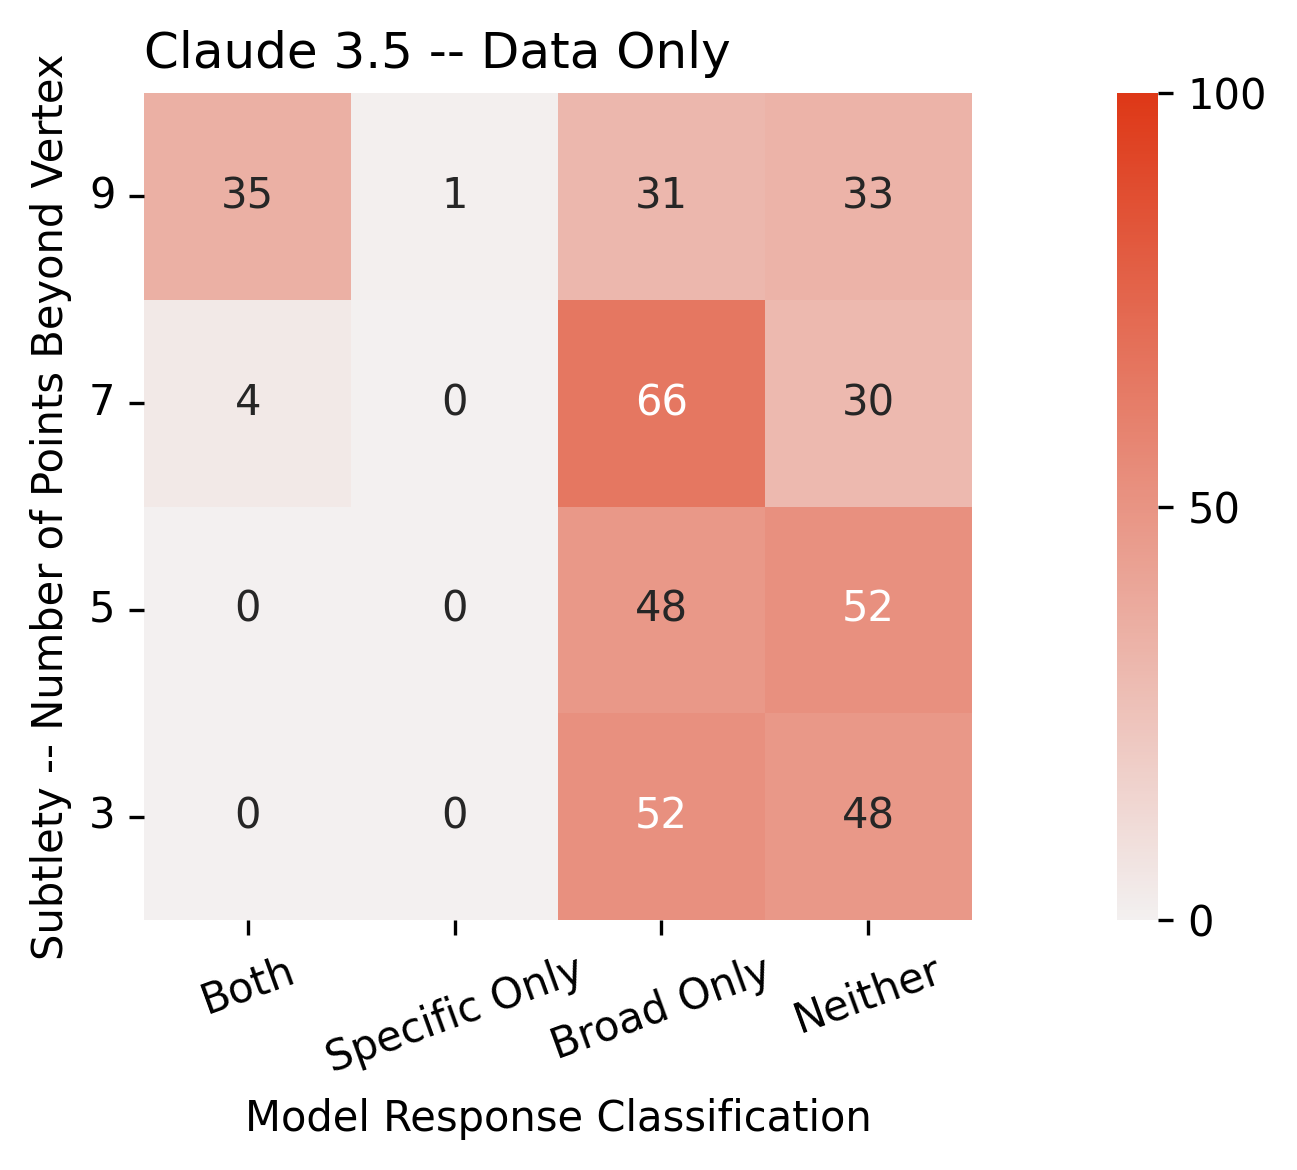

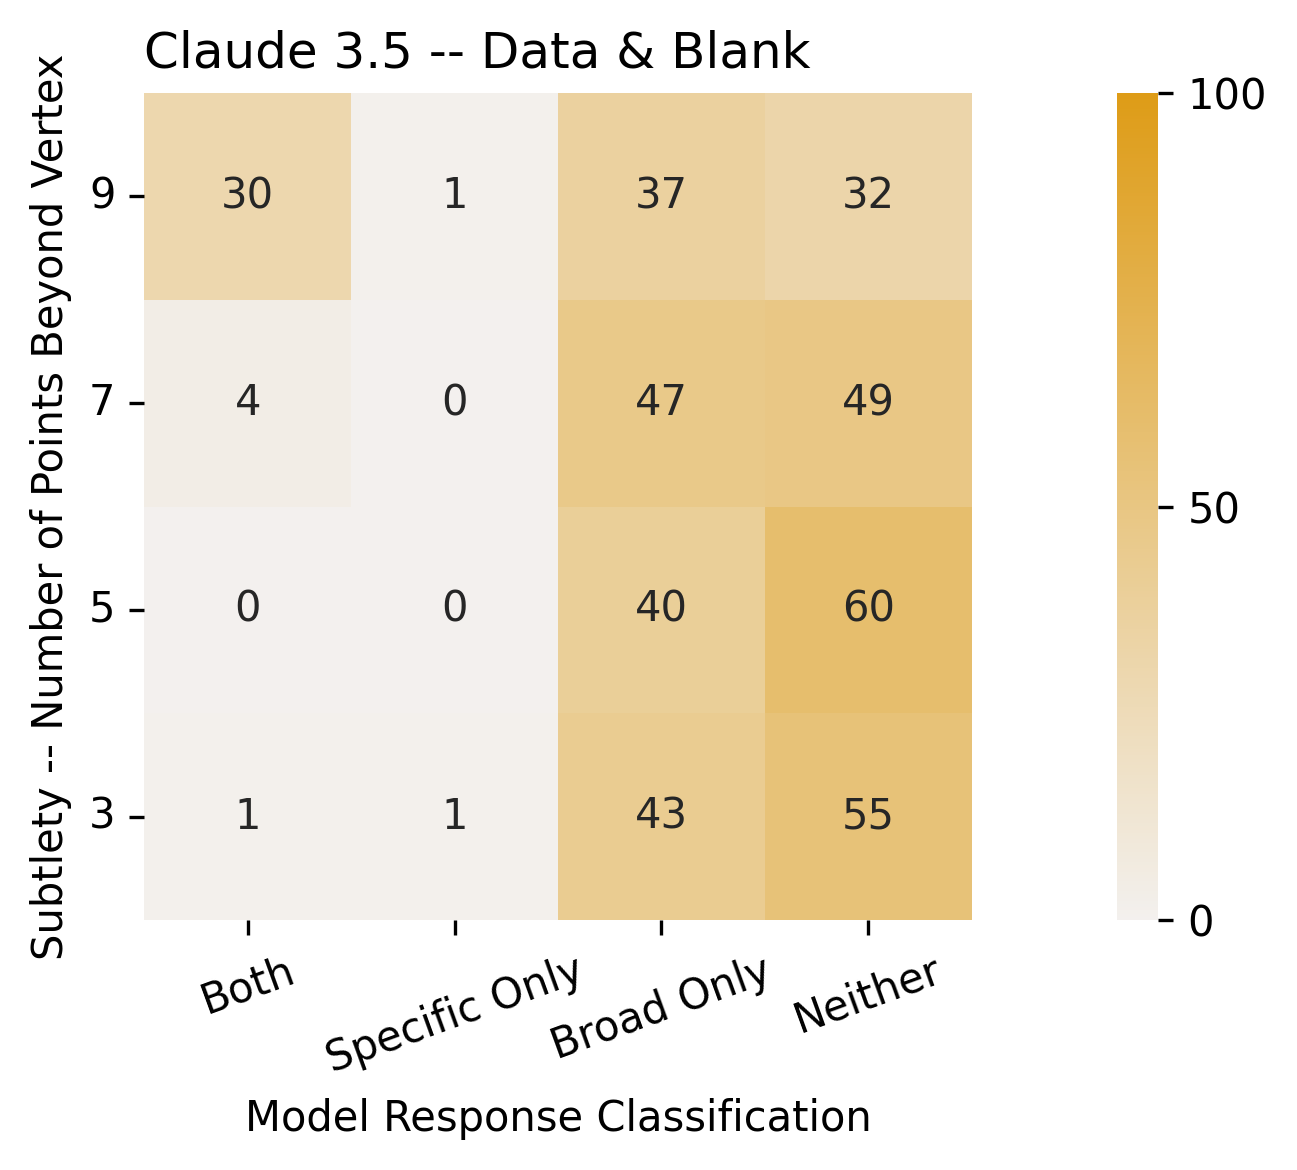

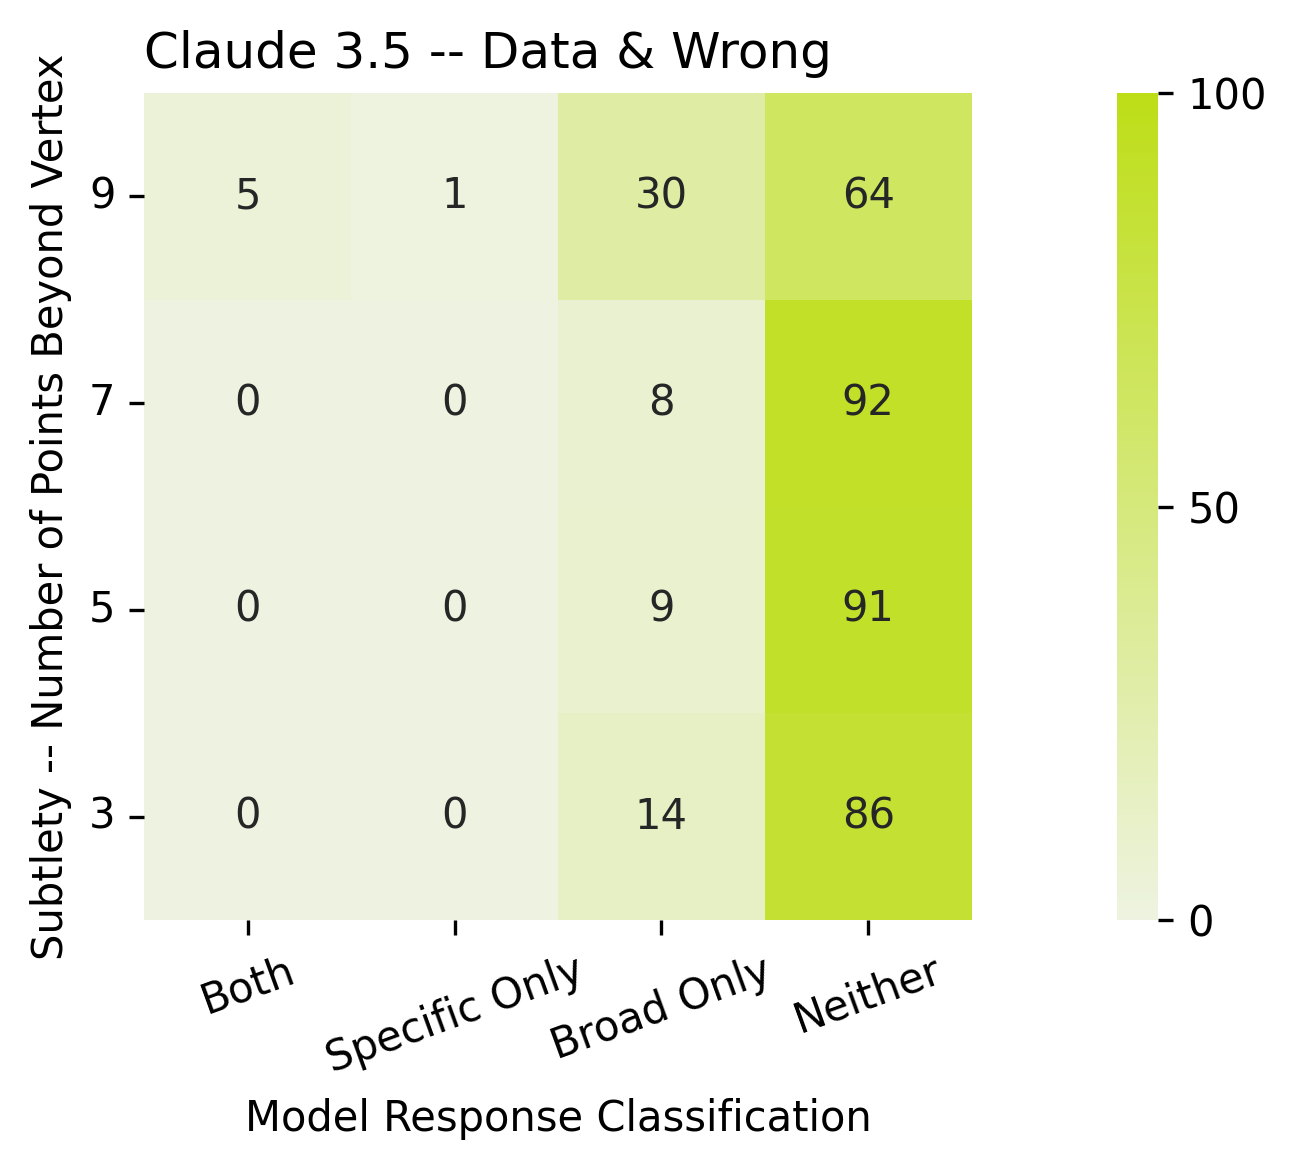

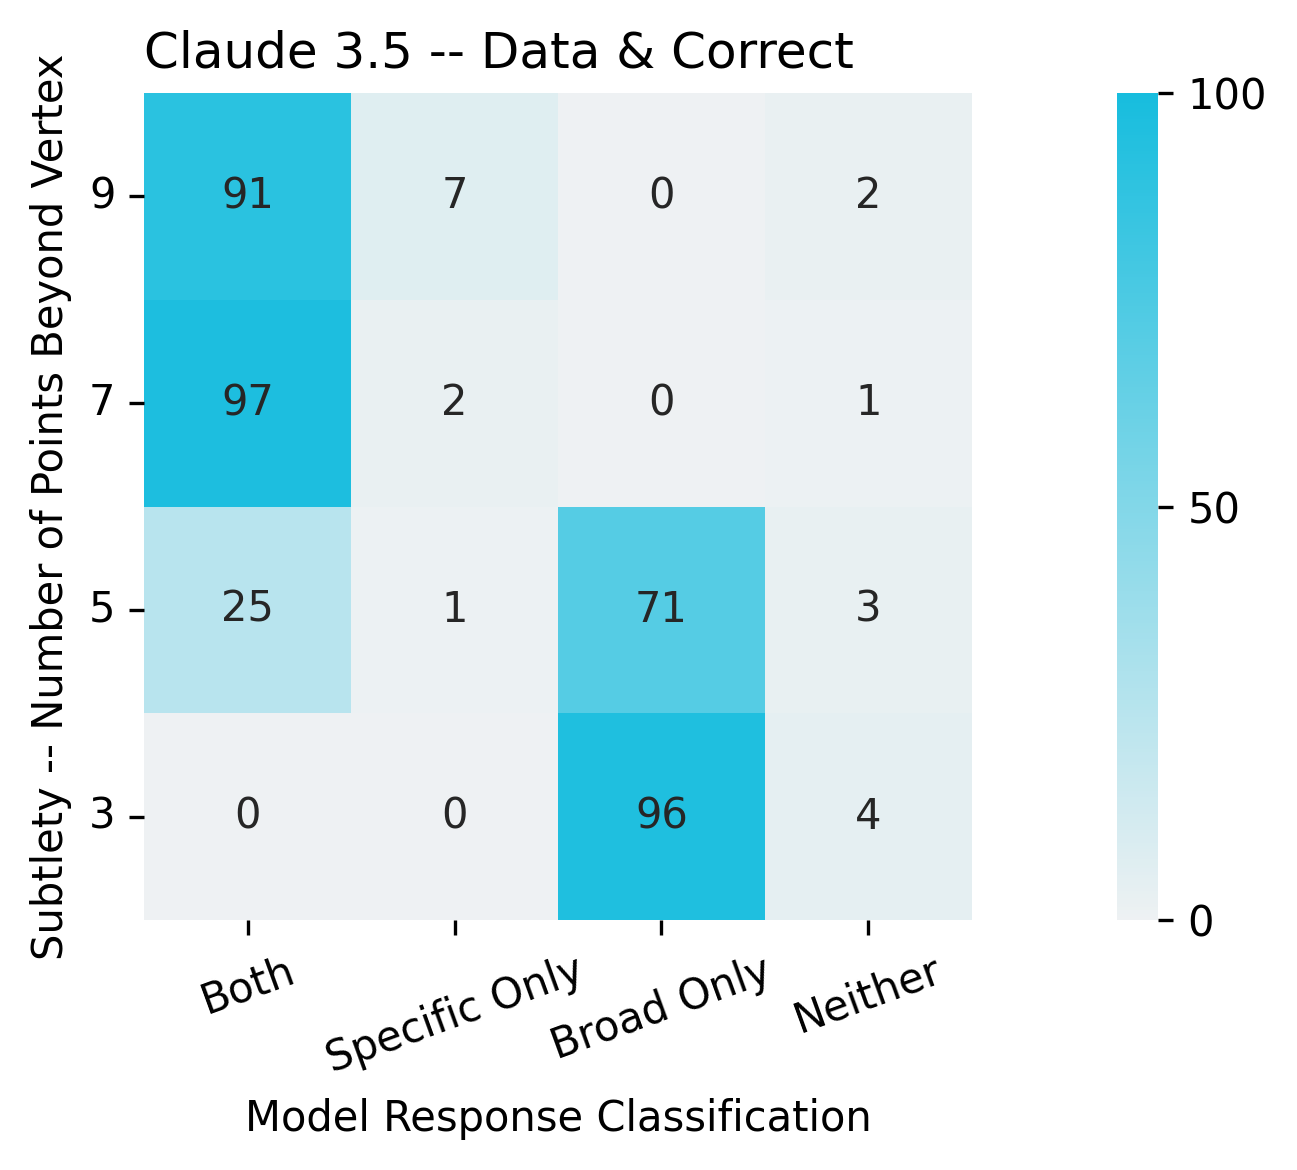

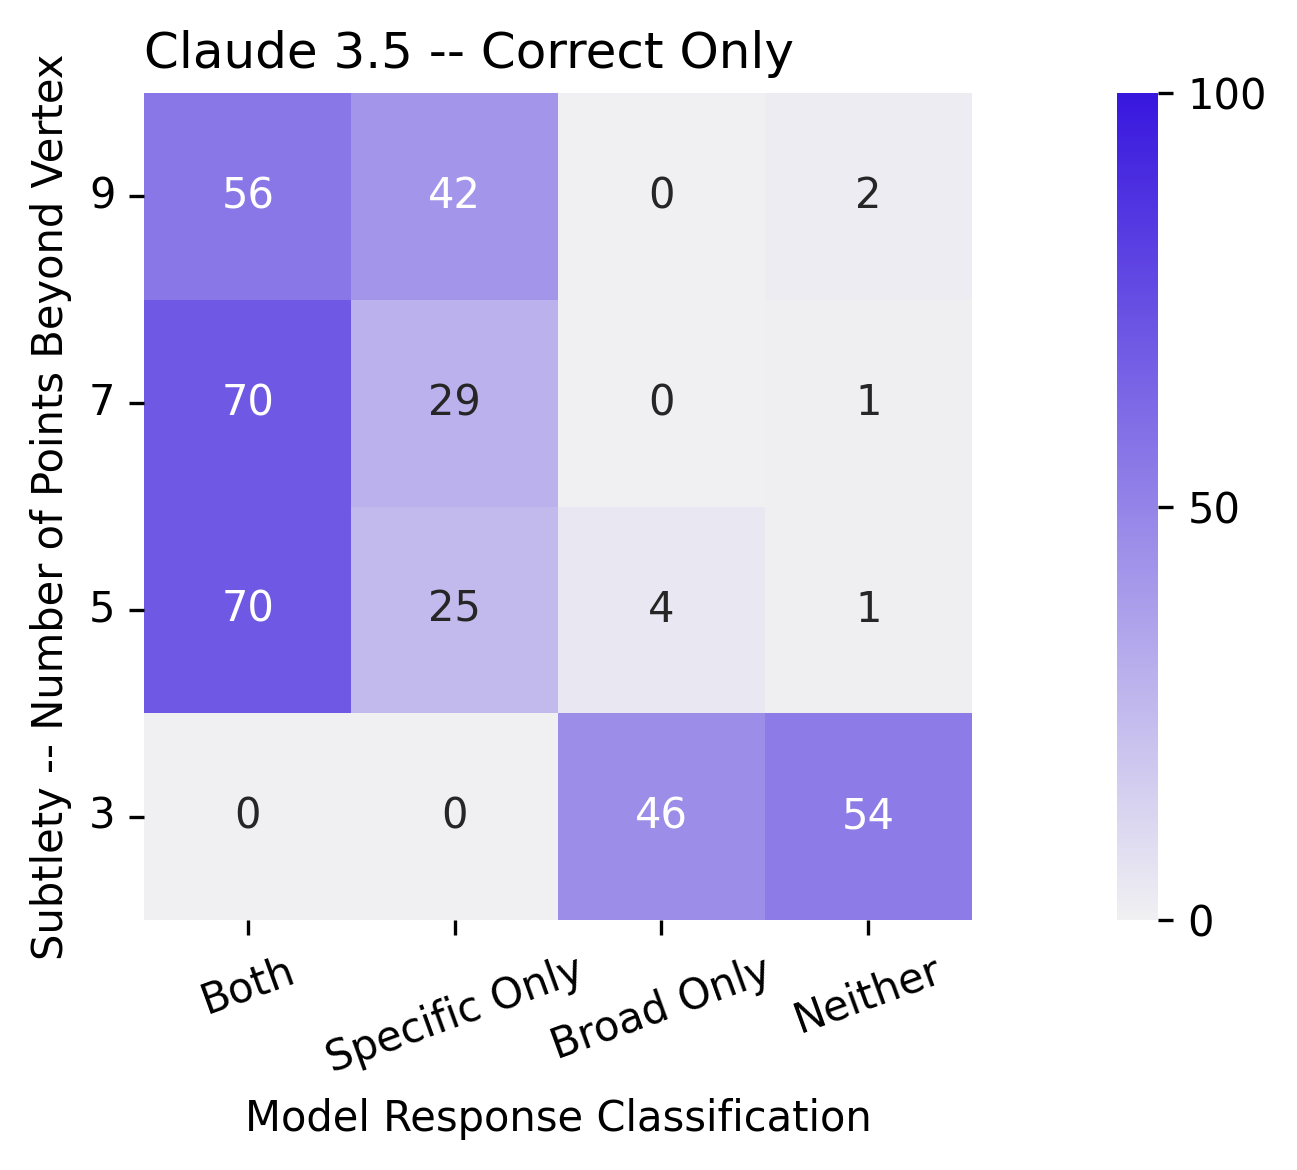

In [4]:
nonlinearity_df = get_nonlinearity_df(success_analysis=False)
for model in nonlinearity_df['model'].unique():
    for condition in [None] + list(condition_rename_map.keys()):
        get_confusion_heatmap(nonlinearity_df, model, condition, "Subtlety -- Number of Points Beyond Vertex", "Model Response Classification", save=False)

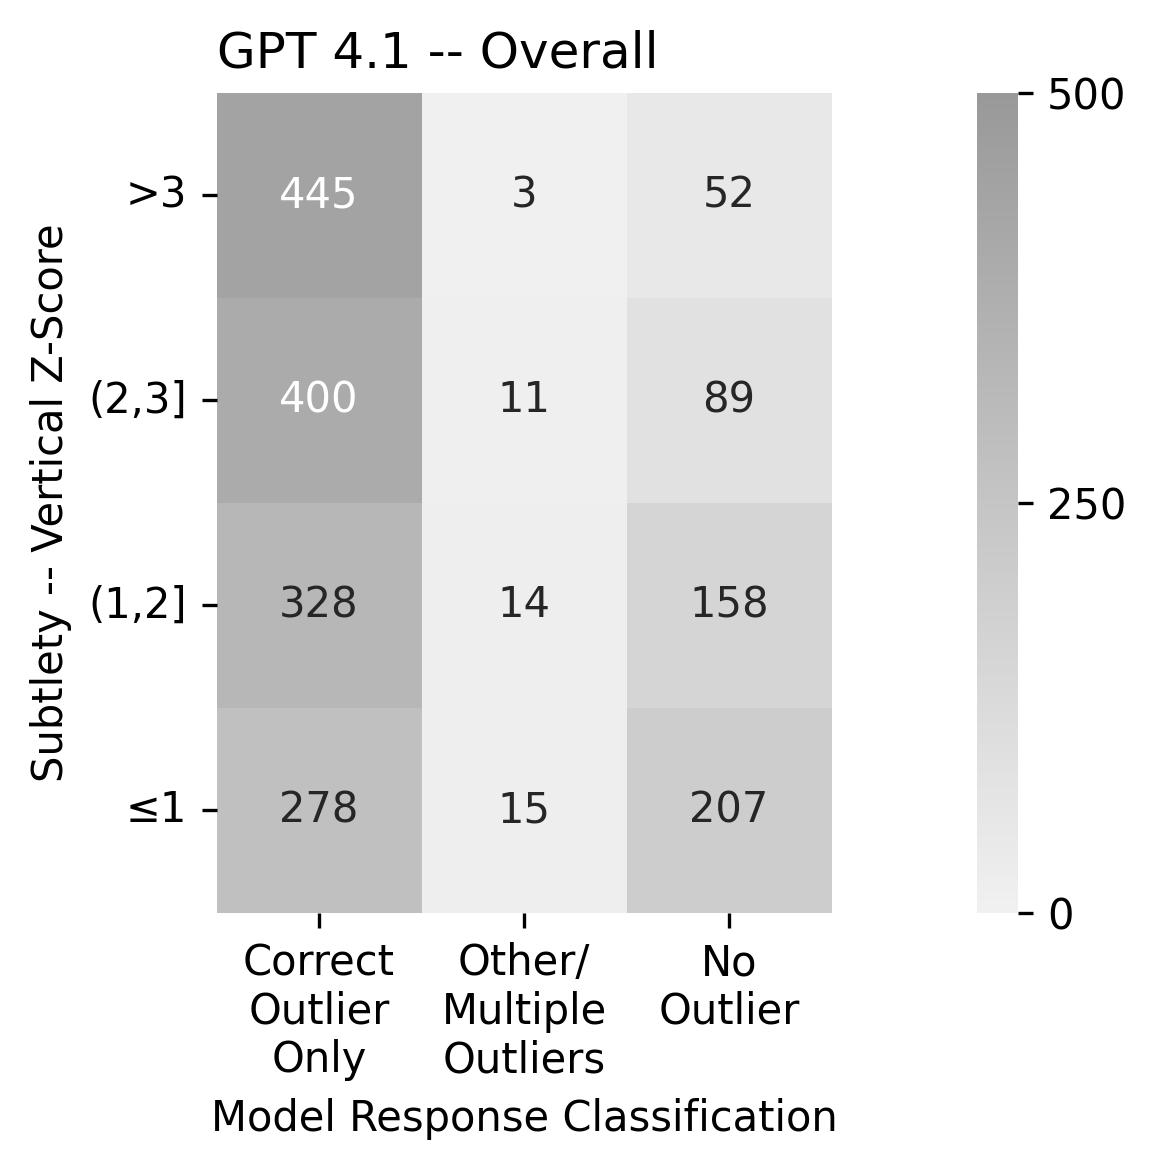

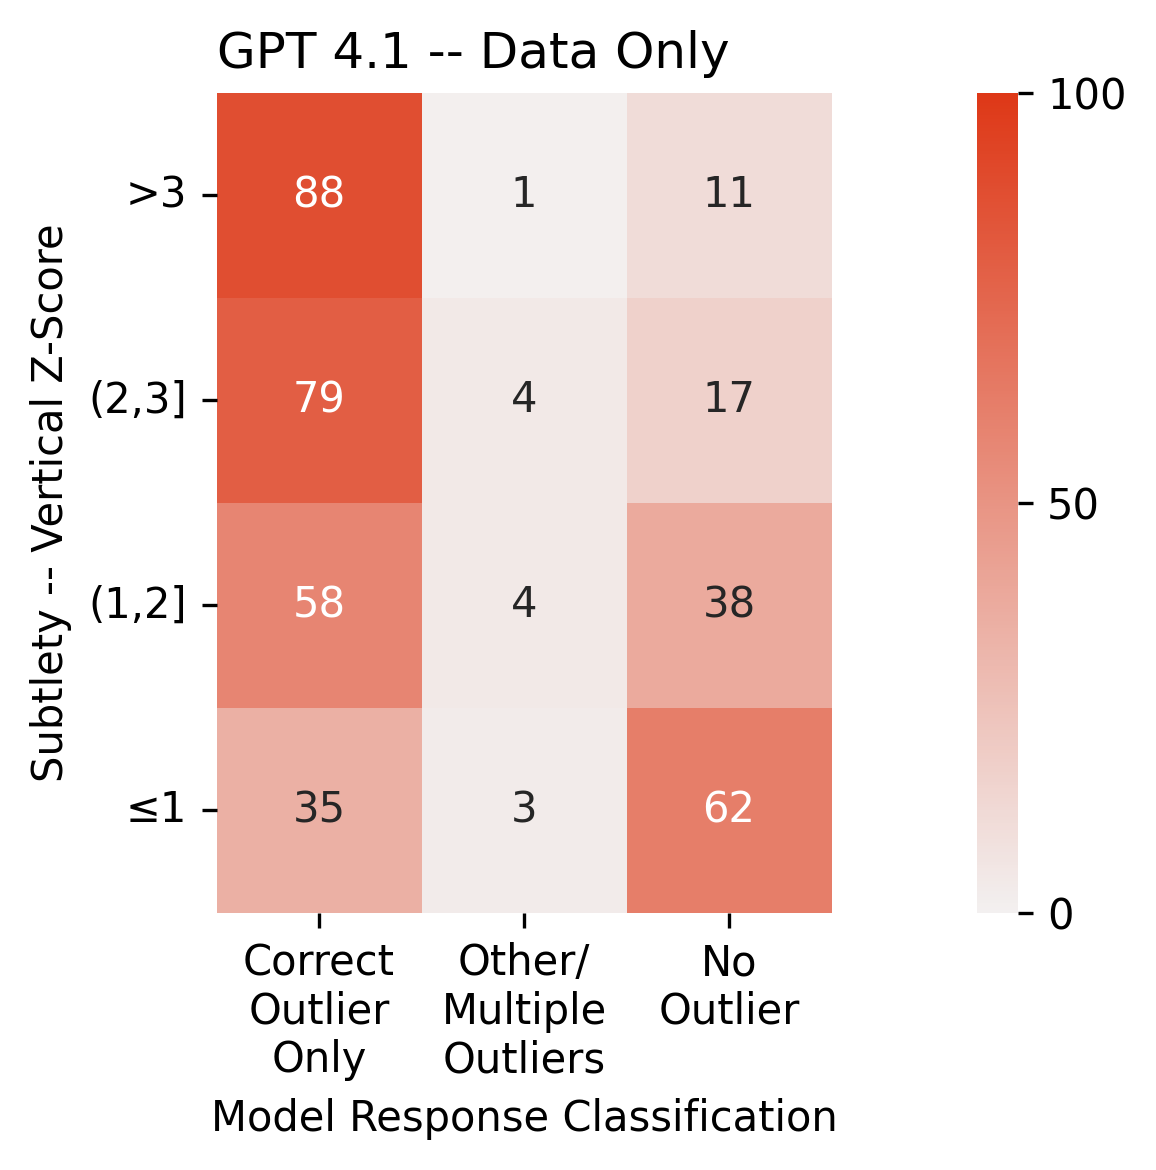

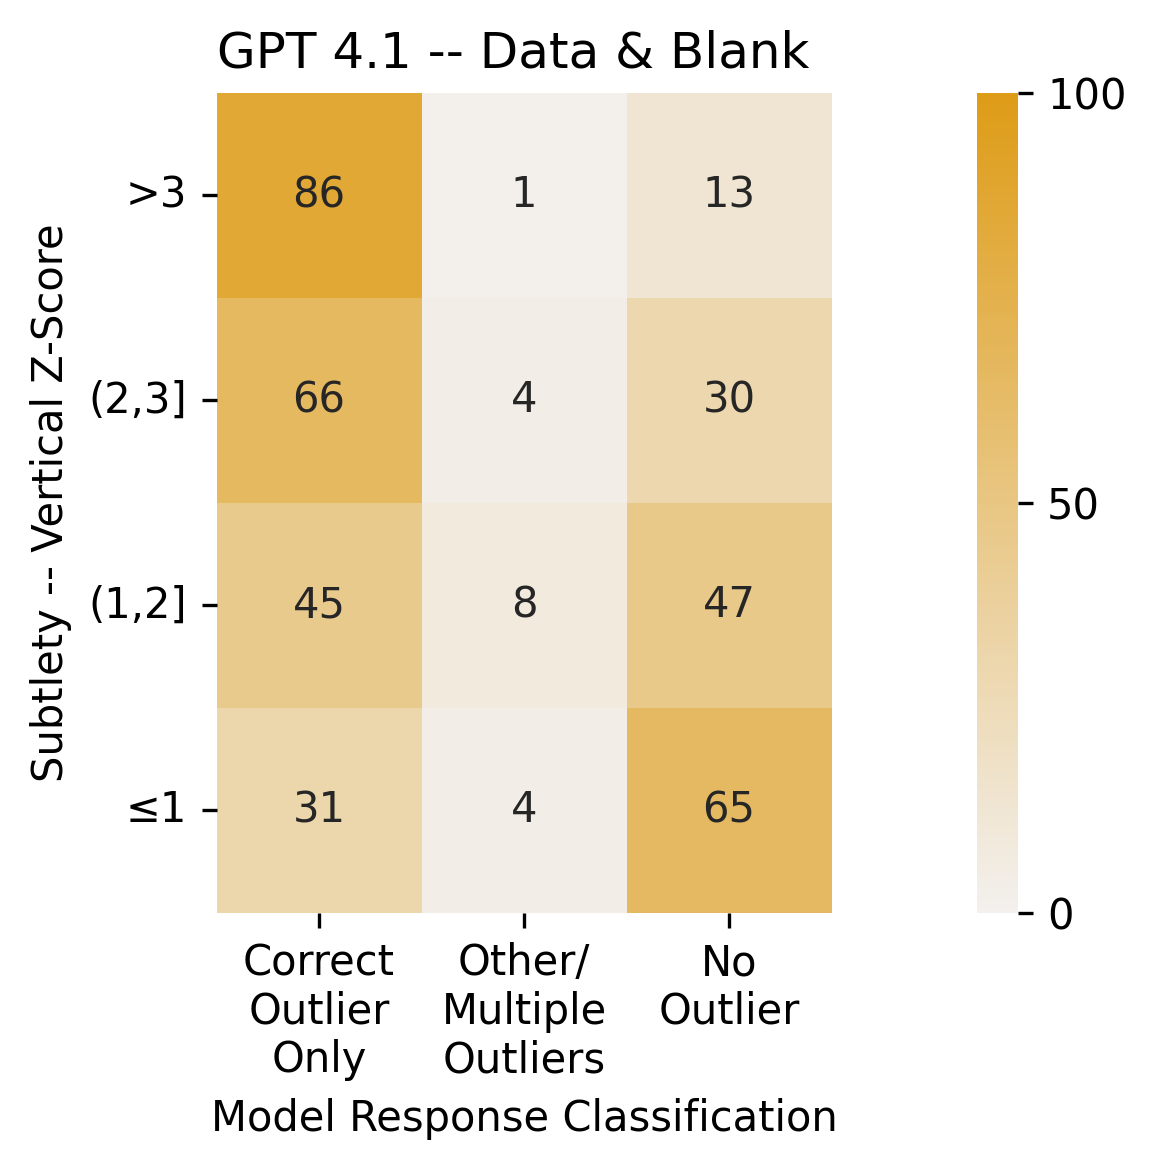

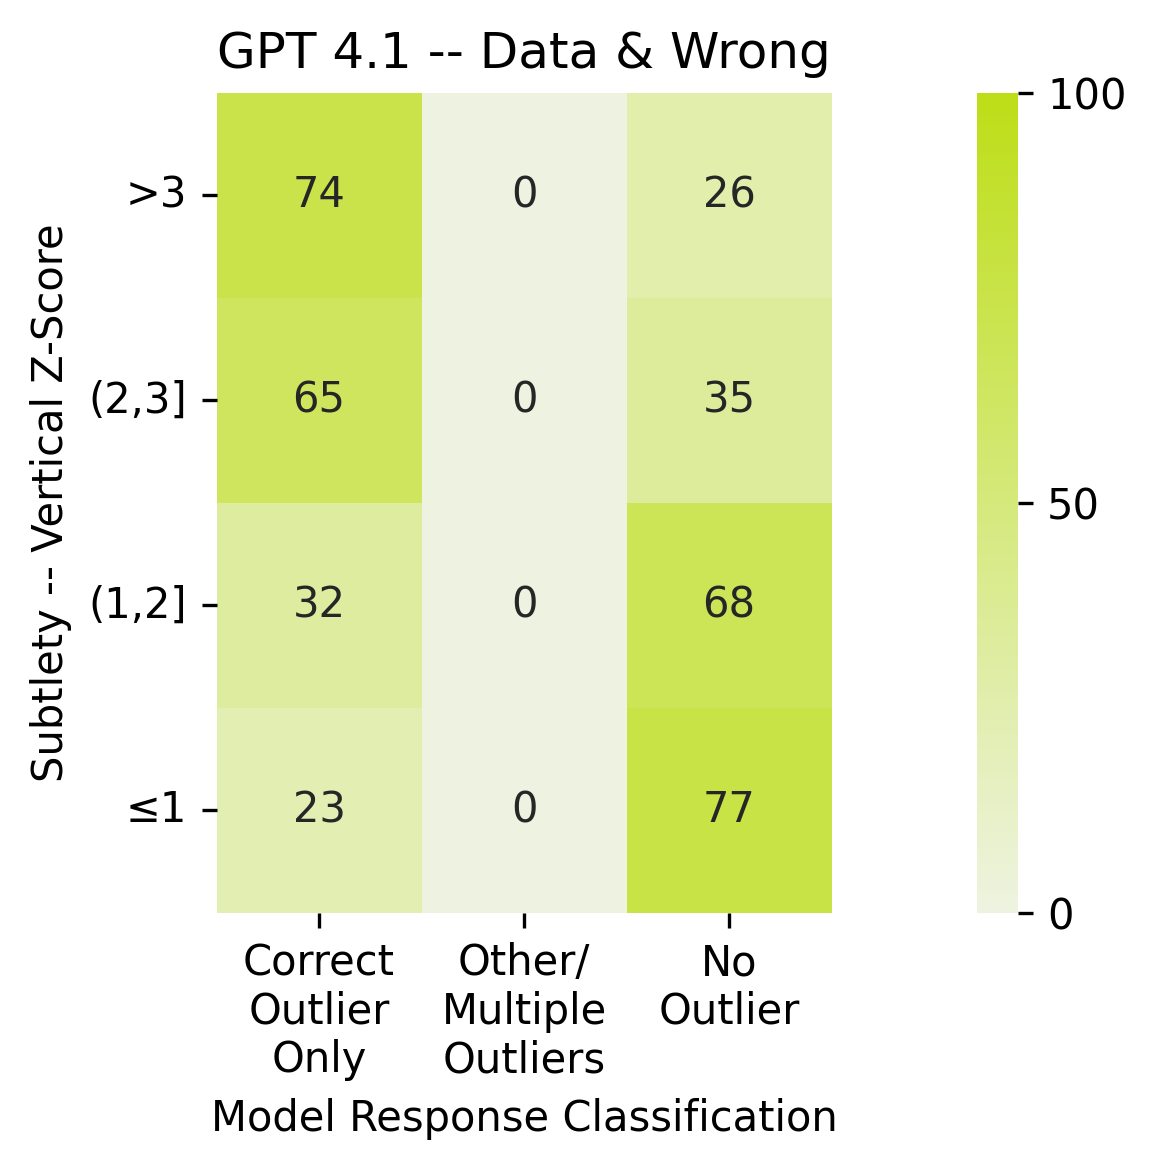

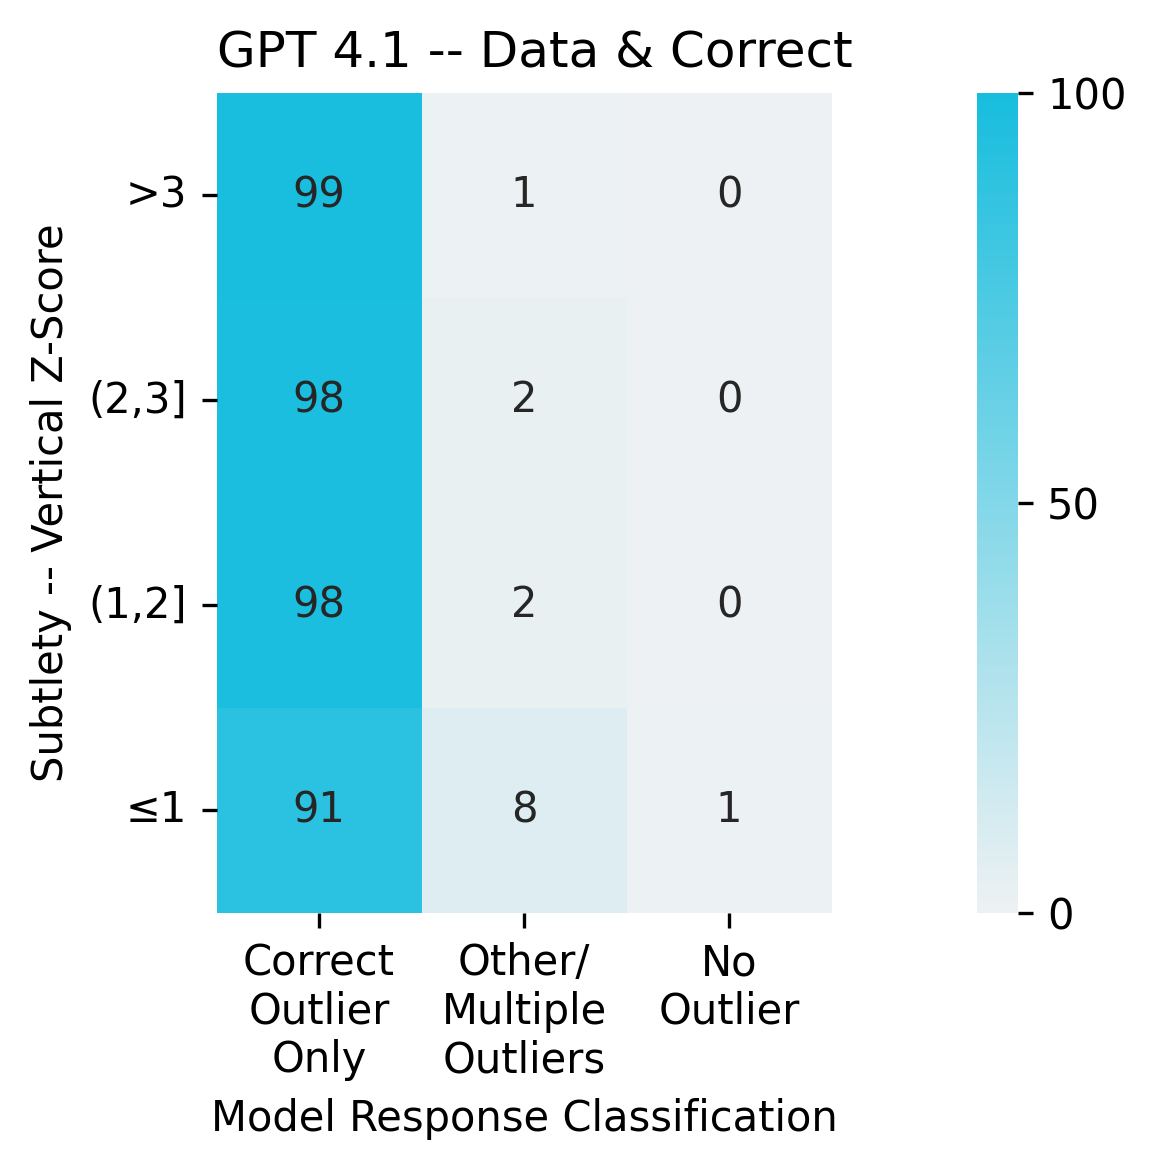

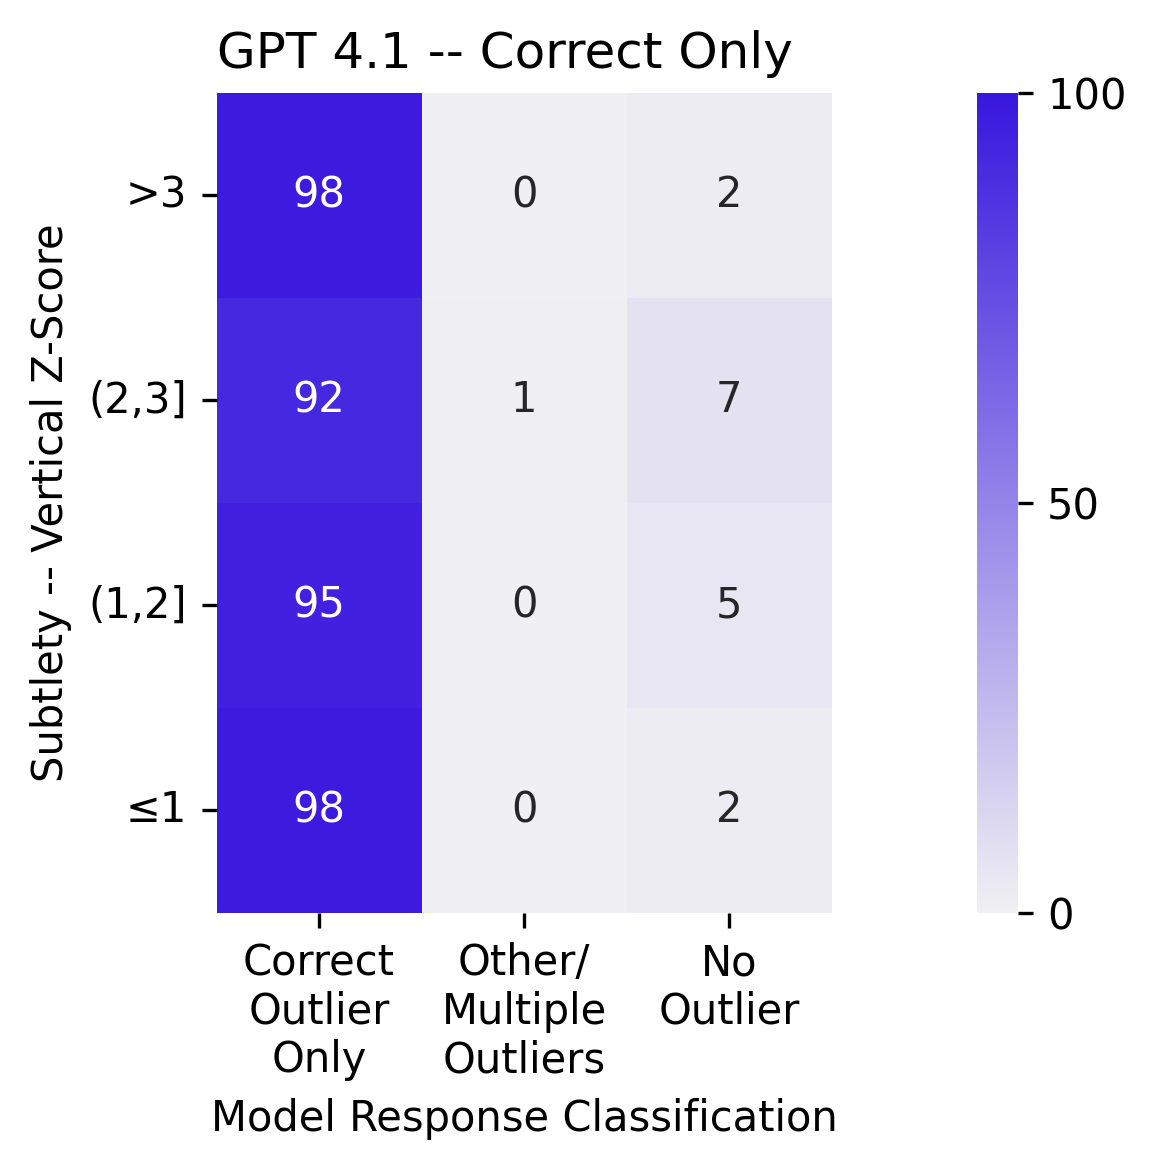

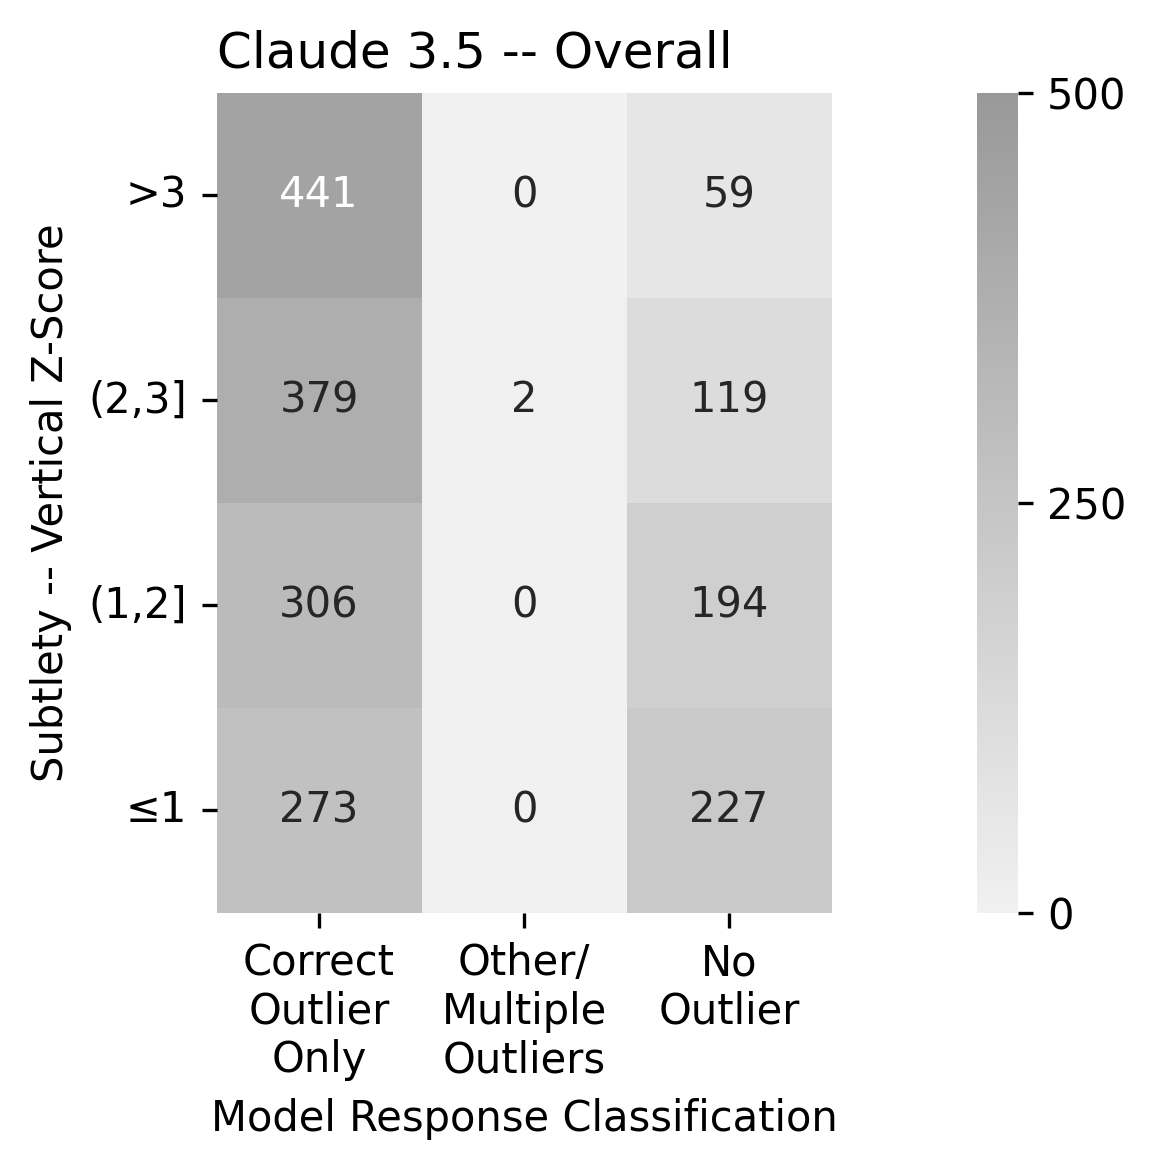

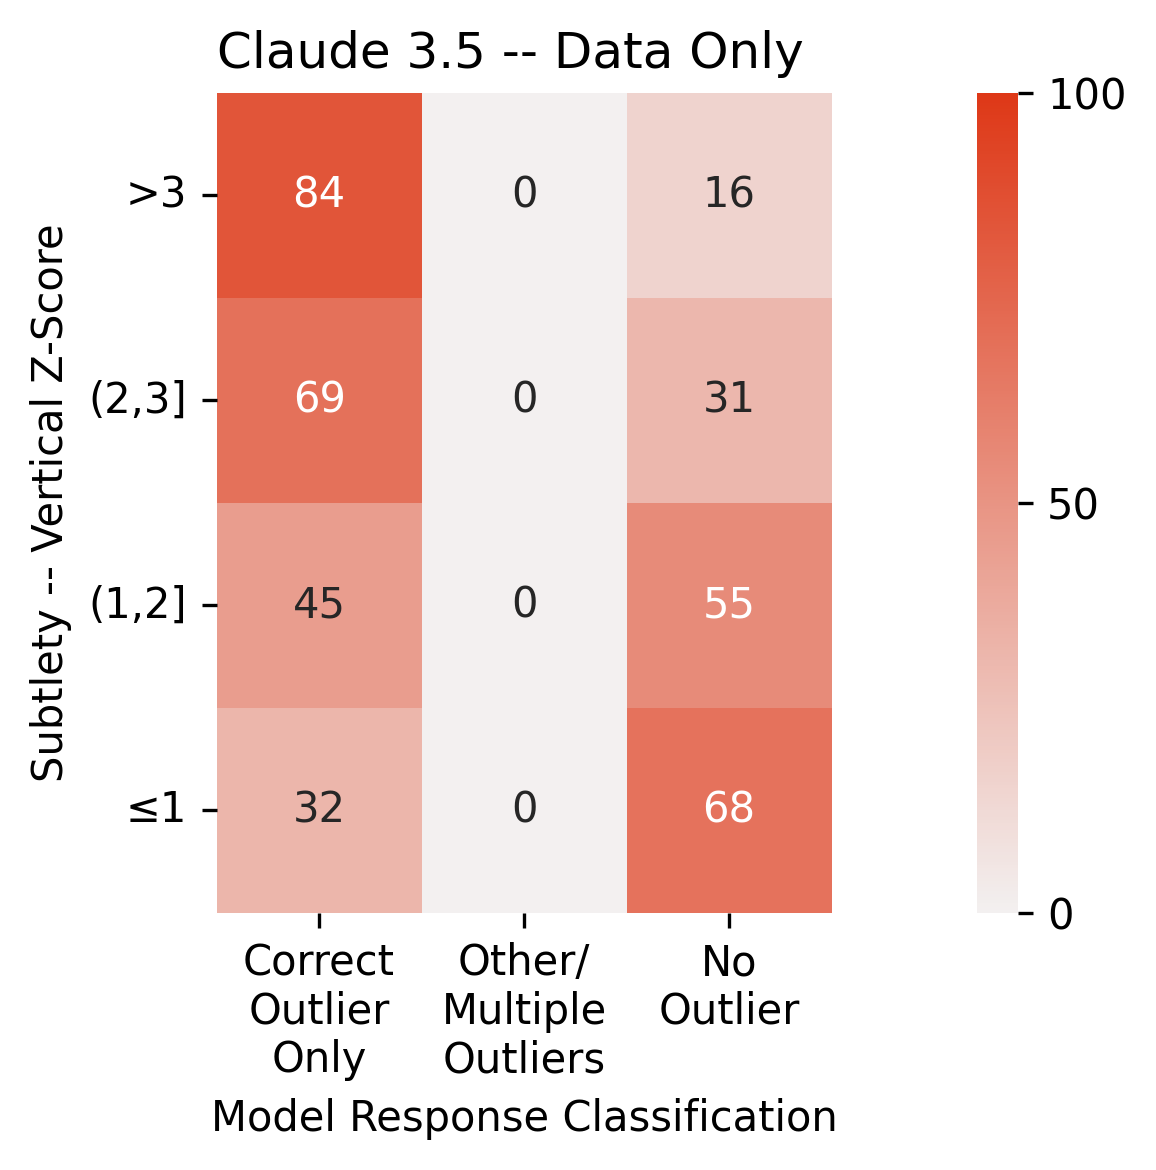

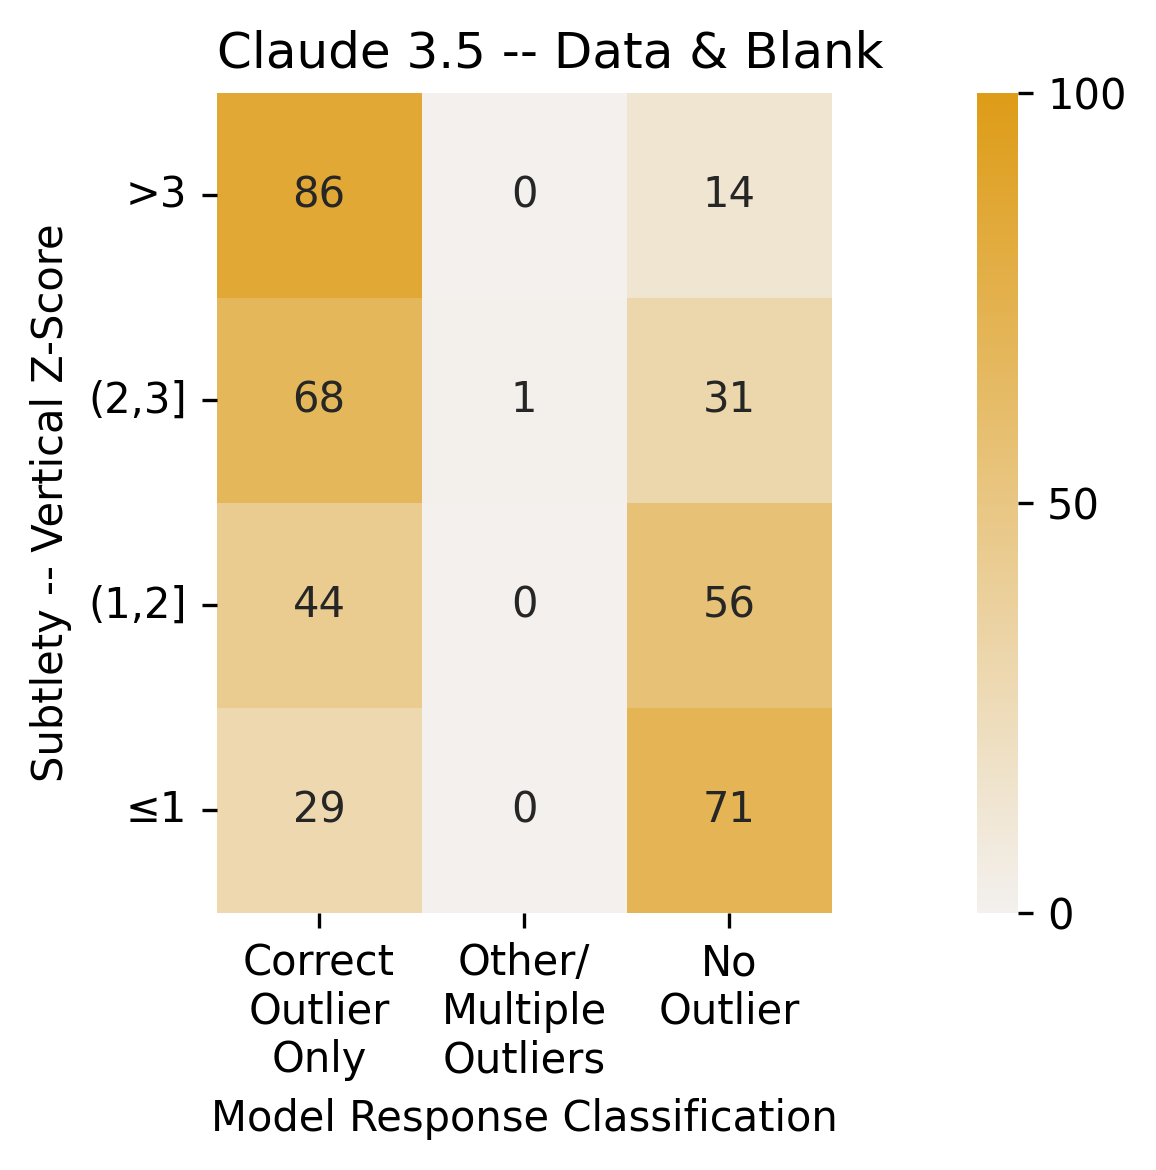

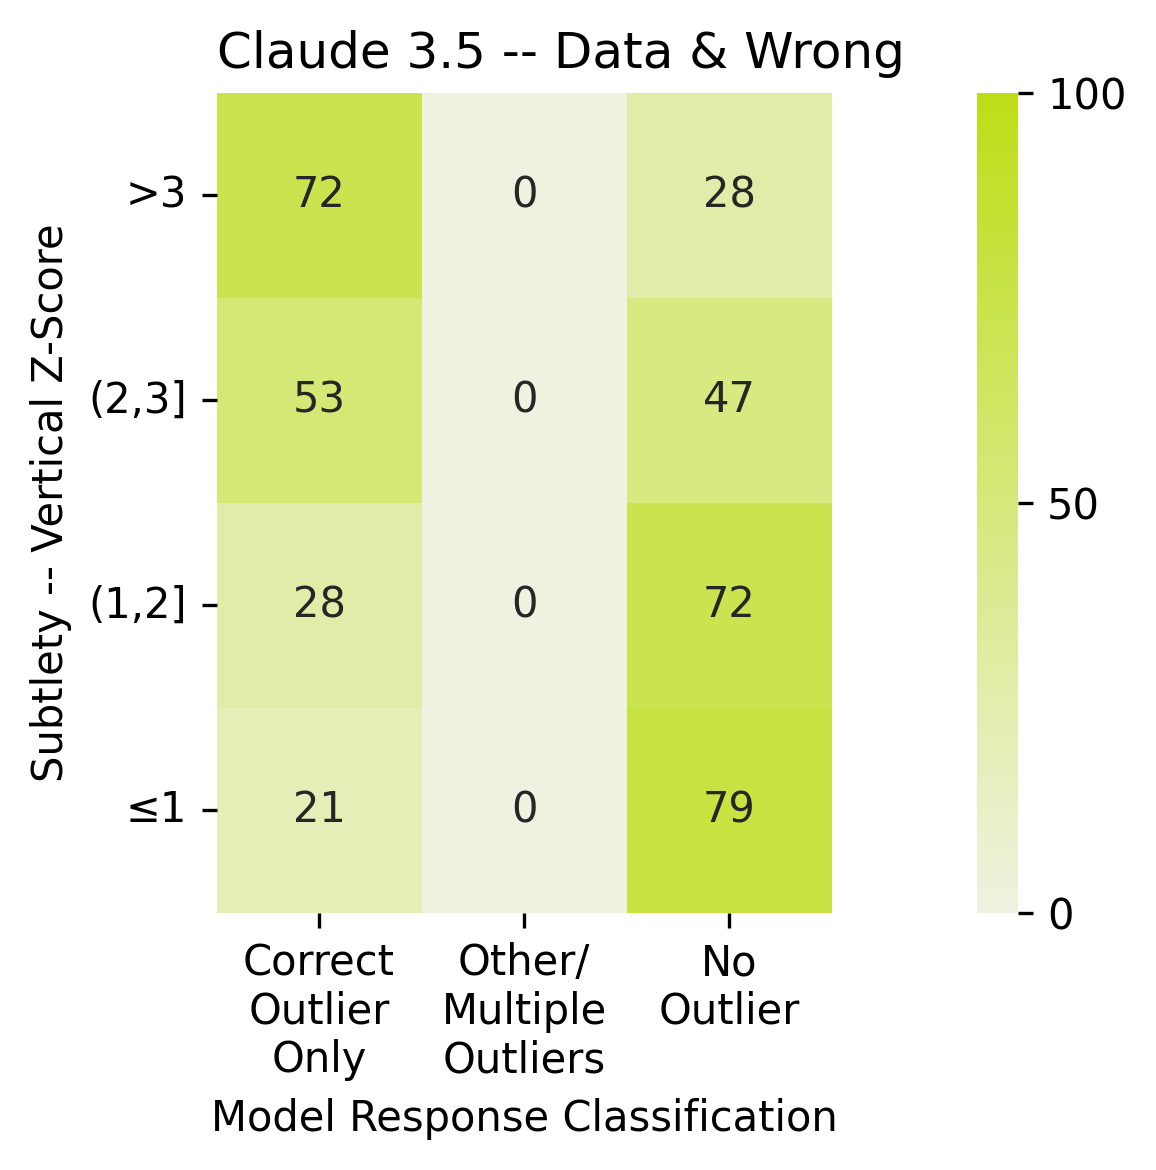

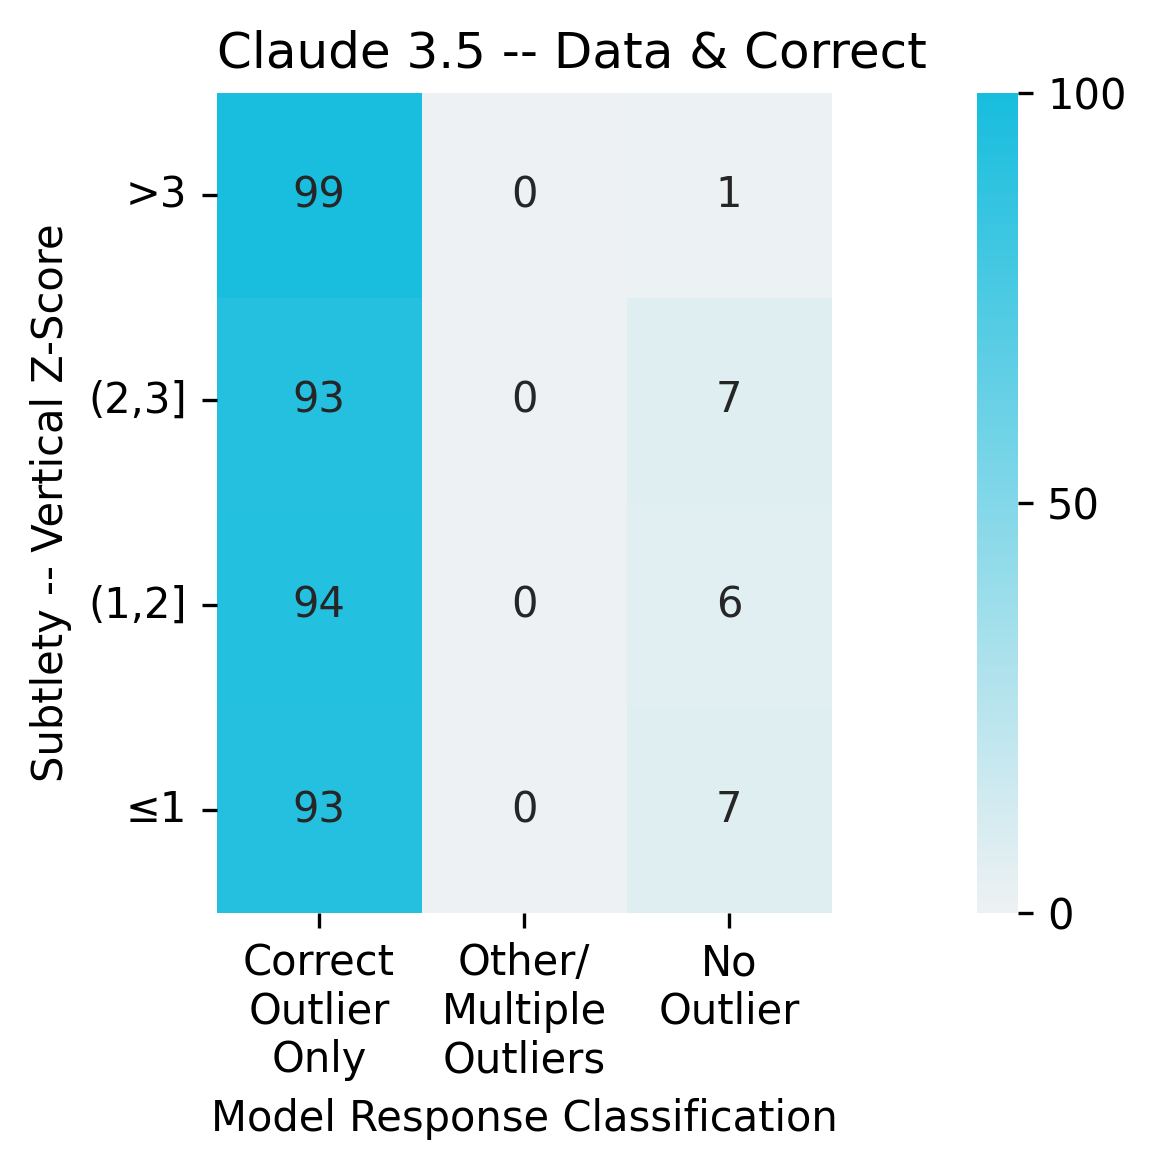

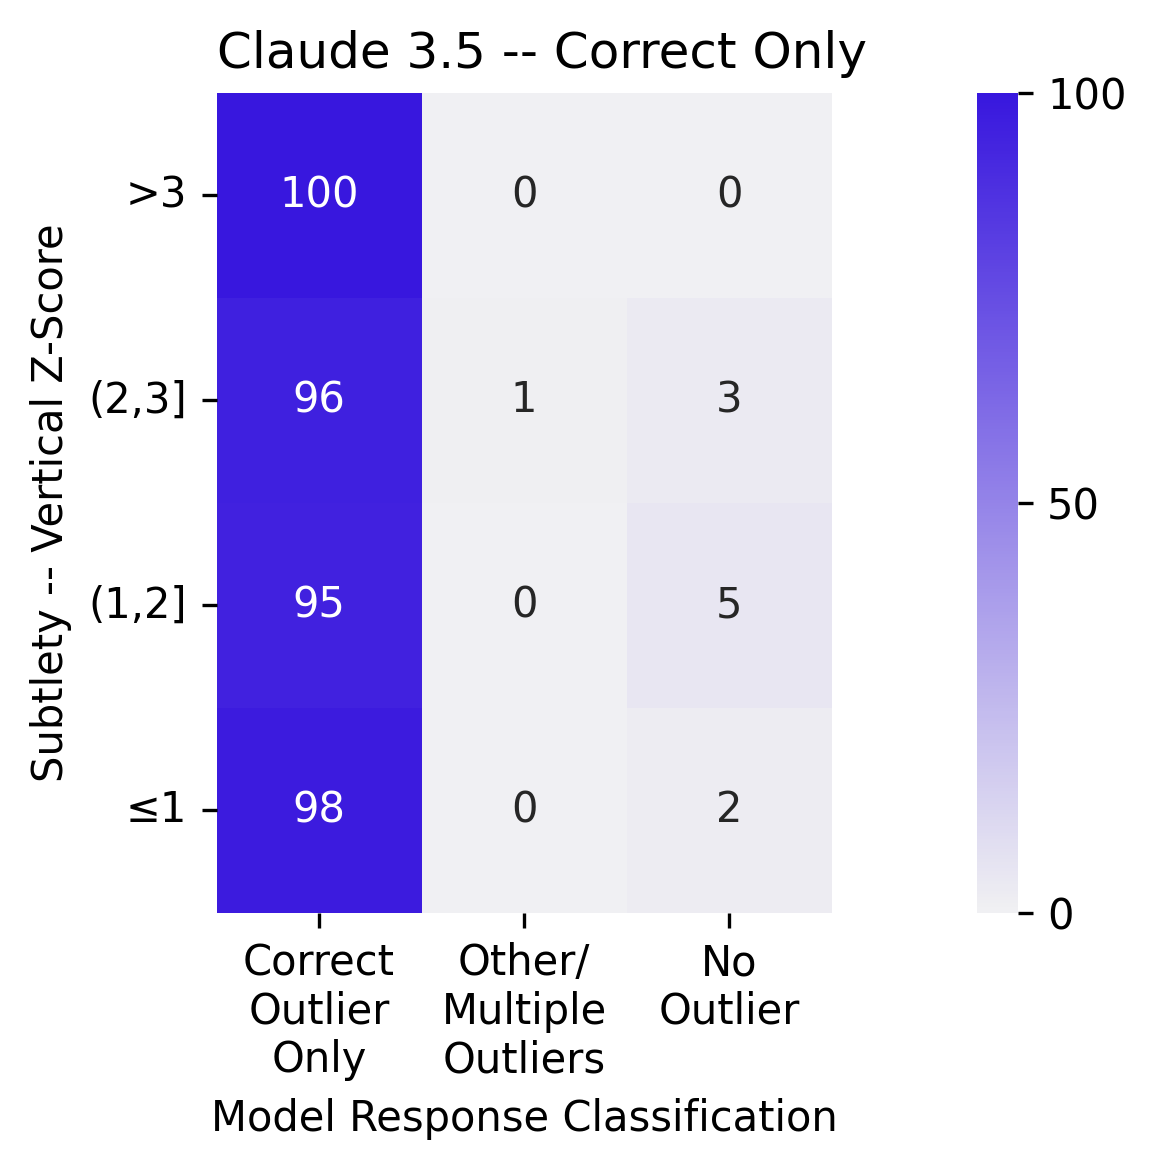

In [5]:
outlier_df = get_outlier_df(success_analysis=False)
for model in outlier_df['model'].unique():
    for condition in [None] + list(condition_rename_map.keys()):
        get_confusion_heatmap(outlier_df, model, condition, "Subtlety -- Vertical Z-Score", "Model Response Classification", save=False)